#**Spam Classifier**

**Leela Alekhya Vedula - 014555047**

**Current progress:**

I have explored different articles to find approach for spam classification . I have taken a Liar Liar and seperated the spam and ham words from it using the data labels given in the dataset.Applied Muller loop on the liar liar dataset and observed accuracy for different classifiers and plotted graphs for results of top 4 classifiers. I have amalgamated it with fake news dataset and also with politifact data and then applied spam classification for the dataset and predicted spam classification for a newly scraped politifact data.

The links to spam dataset is as below:

Liar dataset train.tsv: https://drive.google.com/file/d/1MOJwL4PabKMmt6O2yI5mQldc7WNVhCJR/view?usp=sharing

Liar dataset test.tsv: https://drive.google.com/file/d/14w7UmHQOwy_mJRgdaLPOQN0sBy8-hO20/view?usp=sharing

Liar dataset valid.tsv: https://drive.google.com/file/d/1U_8W2R-oCFjfoZvjWPocmEyGyFZgSO0T/view?usp=sharing

Fake news dataset : https://drive.google.com/file/d/1Wm4kooUj_KlN7PJ_ERHBh08n7LtOoTP4/view?usp=sharing


Amalgamations links:

1st Amalgamation of Liar liar and fake news dataset: https://drive.google.com/file/d/1zufm_gTsCsAzwKLmNvEePJQJWTonAR-D/view?usp=sharing 

2nd Amalgamation: https://drive.google.com/file/d/18G9SvjXdERk92WKgRhlMY81sOk2n5C8r/view?usp=sharing

Pickle and load before amalgamation : https://drive.google.com/file/d/1XxYg4D16YKjHTDXoPUf1qNkStWsrVEnc/view?usp=sharing

Pickle and load after 1st Amalgamation: https://drive.google.com/file/d/1P50uFTLytJCjHHW8V-bn3ZApeKdxpOry/view?usp=sharing

Pickle and load after 2nd Amalgamation: 





**Spam classifier approach**

1.   liar liar dataset(labels)/kaggle fake news dataset.


  *   Read the data
  *   Split the data into train and test sets
  *   Create a formula which describes the model
  * Fit the logistic regression model and add muller loop to get precision recall accuracy values
  * Make predictions on the training and test sets

2. Spam classifications
3. Spam confusion matrix
4. Comparing spam filter performance on data with different proportions of spam and add prototypes to test on it.
5. Putting this results to our spam dataset to test it.



## **Liar Liar dataset**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set() 
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -U -q PyDrive

In [ ]:
# Code to read csv file into colaboratory:

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1MOJwL4PabKMmt6O2yI5mQldc7WNVhCJR'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.tsv')
downloaded = drive.CreateFile({'id':'14w7UmHQOwy_mJRgdaLPOQN0sBy8-hO20'}) # replace the id with id of file you want to access
downloaded.GetContentFile('test.tsv')
downloaded = drive.CreateFile({'id':'1U_8W2R-oCFjfoZvjWPocmEyGyFZgSO0T'}) # replace the id with id of file you want to access
downloaded.GetContentFile('valid.tsv')

In [ ]:
colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

train_news = pd.read_csv("train.tsv", sep='\t', names = colnames, error_bad_lines=False)
test_news = pd.read_csv("test.tsv", sep='\t', names = colnames, error_bad_lines=False)
valid_news = pd.read_csv("valid.tsv", sep='\t', names = colnames, error_bad_lines=False)

In [ ]:
train_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [ ]:
test_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


In [ ]:
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


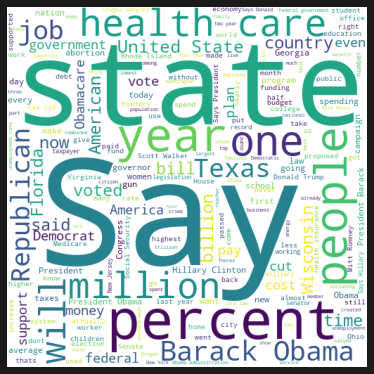

In [ ]:
from wordcloud import WordCloud
trainNewsWords = (' '.join(train_news['headline_text']))
train_cloud = WordCloud(width = 512,height = 512,background_color = "white").generate(trainNewsWords)
plt.figure(figsize = (5, 5), facecolor = 'k')
plt.imshow(train_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


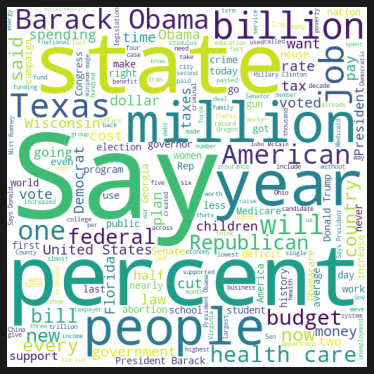

In [ ]:
from wordcloud import WordCloud
testNewsWords = (' '.join(test_news['headline_text']))
test_cloud = WordCloud(width = 512,height = 512,background_color = "white").generate(testNewsWords)
plt.figure(figsize = (5,5), facecolor = 'k')
plt.imshow(test_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

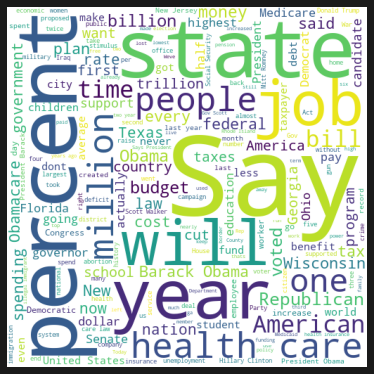

In [ ]:
from wordcloud import WordCloud
validNewsWords = (' '.join(valid_news['headline_text']))
valid_cloud = WordCloud(width = 512,height = 512,background_color = "white").generate(validNewsWords)
plt.figure(figsize = (5, 5), facecolor = 'k')
plt.imshow(valid_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

##Using TFIDF vectorizer - Term Frequency Inverse Document Frequency
TfidfVectorizer weights the word counts by a measure of how often they appear in the documents. It helps us in dealing with most frequent words.

Liar liar dataset 

In [ ]:
train_news['label'].unique()

array(['false', 'half-true', 'mostly-true', 'true', 'barely-true',
       'pants-fire'], dtype=object)

In [ ]:
train_news['class_label'] = train_news['label'].map({'true': 0, 'mostly-true':0, 'false':1, 'half-true':1, 'barely-true':1, 'pants-fire':1})
train_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,class_label
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,1
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,0
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,1
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1


Consider liar liar dataset and labelling spam or ham categories in it

In [ ]:
train_news['SpamHam'] = train_news['class_label'] .map({0:'ham', 1:'spam'})
train_news.head()


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,class_label,SpamHam
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,1,spam
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1,spam
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,0,ham
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,1,spam
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1,spam


Exploring and visualizing spam data in the dataset 

In [ ]:
train_news['SpamHam'].value_counts()

spam    6602
ham     3638
Name: SpamHam, dtype: int64

In [ ]:
data_spam = train_news[train_news.SpamHam =='spam']
data_spam

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,class_label,SpamHam
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,1,spam
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1,spam
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,1,spam
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1,spam
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,1,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,4388.json,pants-fire,Mayor Fung wants to punish our childrens educa...,"children,city-budget,deficit,education,state-b...",richard-tomlins,NaN,Rhode Island,democrat,0.0,0.0,0.0,0.0,1.0,a recorded telephone message to Cranston resid...,1,spam
10234,1592.json,half-true,"Under the ruling of the Supreme Court, any lob...","corporations,elections",david-axelrod,NaN,NaN,democrat,2.0,1.0,6.0,7.0,0.0,an interview on ABC's This Week,1,spam
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,1,spam
10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,1,spam


Assigning label values as 1 to spam and 0 to ham

In [ ]:
train_news['message_len'] = train_news.headline_text.apply(len)
train_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,class_label,SpamHam,message_len
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,1,spam,82
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1,spam,141
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,0,ham,105
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,1,spam,78
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1,spam,54


By observing the below plot which is done through basic Exploratory Data Analysis, we observe that a trend that spam messages tend to have more characters.

Text(0.5, 0, 'Message Length')

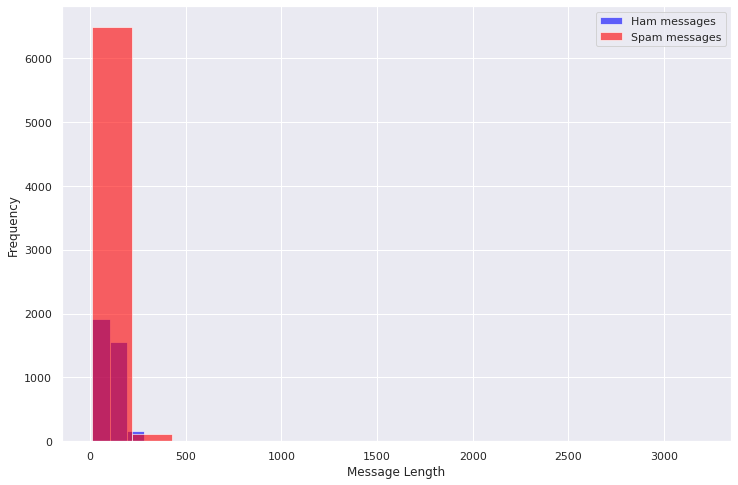

In [ ]:
plt.figure(figsize=(12, 8))

train_news[train_news.SpamHam=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
train_news[train_news.SpamHam=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

Splitting data into train and test

In [ ]:
totaldataValues = 6602 +3638
training_index, testing_index = list(), list()
for i in range(train_news.shape[0]):
    if np.random.uniform(0, 1) < 0.75:
        training_index += [i]
    else:
        testing_index += [i]
train_data = train_news.loc[training_index]
test_data = train_news.loc[testing_index]

In [ ]:
train_data.reset_index(inplace = True)
train_data.drop(['index'], axis = 1, inplace = True)
train_data.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,class_label,SpamHam,message_len
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1,spam,141
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,0,ham,105
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,1,spam,78
3,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,0,ham,155
4,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,0,ham,132


In [ ]:
test_data.reset_index(inplace = True)
test_data.drop(['index'], axis = 1, inplace = True)
test_data.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,class_label,SpamHam,message_len
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,1,spam,82
1,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1,spam,54
2,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,1,spam,69
3,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",1,spam,159
4,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,1,spam,144


In [ ]:
train_data['SpamHam'].value_counts()

spam    4900
ham     2662
Name: SpamHam, dtype: int64

In [ ]:
test_data['SpamHam'].value_counts()

spam    1702
ham      976
Name: SpamHam, dtype: int64

Plotting word cloud for spam words

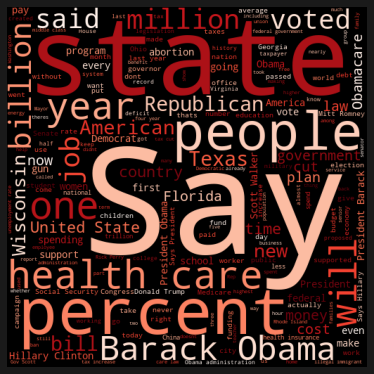

In [ ]:
from wordcloud import WordCloud
spamWords = ' '.join(list(train_news[train_news.class_label== 1]['headline_text']))
spam_cloud = WordCloud(width = 512,height = 512,background_color = "black", colormap="Reds").generate(spamWords)
plt.figure(figsize = (5, 5), facecolor = 'k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Plotting word cloud for ham words

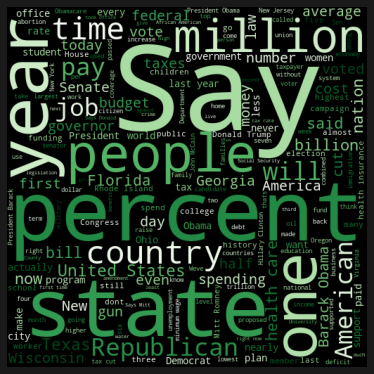

In [ ]:
from wordcloud import WordCloud
hamWords = ' '.join(list(train_news[train_news.class_label== 0]['headline_text']))
ham_cloud = WordCloud(width = 512,height = 512,background_color = "black", colormap="Greens").generate(hamWords)
plt.figure(figsize = (5, 5), facecolor = 'k')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
train_data.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,class_label,SpamHam,message_len
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1,spam,141
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,0,ham,105
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,1,spam,78
3,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,0,ham,155
4,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,0,ham,132


importing nltk library 

In [ ]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from math import log, sqrt
import re


##Data Preprocessing
  By considering in a string of text, and then performing the following:

    1. Removing all punctuation
    2. Removing all stopwords
    3. Returning a list of the cleaned text



In [ ]:
def message_processing(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [ ]:
class SpamClassifier(object):
    def __init__(self, train_data, method = 'tf-idf'):
        self.mails, self.labels = train_data['headline_text'], train_data['class_label']
        self.method = method

    def process_message(self, message, lower_case = True, stem = True, stop_words = True, gram = 2):
      if lower_case:
          message = message.lower()
      words = word_tokenize(message)
      words = [w for w in words if len(w) > 2]
      if gram > 1:
          w = []
          for i in range(len(words) - gram + 1):
              w += [' '.join(words[i:i + gram])]
          return w
      if stop_words:
          sw = stopwords.words('english')
          words = [word for word in words if word not in sw]
      if stem:
          stemmer = PorterStemmer()
          words = [stemmer.stem(word) for word in words]   
      return words

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        for i in range(noOfMessages):
            message_processed = self.process_message(self.mails[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels[i]:
                    self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                    self.spam_words += 1
                else:
                    self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                    self.ham_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels[i]:
                    self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                else:
                    self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
                    
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                if self.method == 'tf-idf':
                    pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                else:
                    pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                if self.method == 'tf-idf':
                    pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                else:
                    pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
        return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = self.process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [ ]:
sc_tf_idf = SpamClassifier(train_data, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(test_data['headline_text'])

In [ ]:
sc_tf_idf.classify(sc_tf_idf.process_message("Health care reform legislation is likely to mandate free sex change surgeries"))

True

In [ ]:
# train_news['clean_msg'] = train_news.headline_text.apply(message_processing)


In [ ]:
train_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,class_label,SpamHam,message_len
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,1,spam,82
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1,spam,141
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,0,ham,105
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,1,spam,78
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1,spam,54


### **Applying all classifiers using MullerLoop**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes",
         "XGBoost","LogisticRegression"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(train_news['headline_text'], train_news['class_label'], test_size = 0.3, random_state = 0)
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(X_train)
x_test = vectorizer.transform(X_test)
# x_train = np.array(x_train)
# y_train = np.array(y_train)
# x_test = np.array(x_test)
# y_test_np = np.array(y_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7168, 10427)
(3072, 10427)
(7168,)
(3072,)


In [ ]:
ylabel = train_news['class_label'].unique()
ylabels=["1" if x == 1 else "0" for x in ylabel]
ylabels

['1', '0']

Classifier = Nearest Neighbors, Score (test, accuracy) = 53.91, Training time = 1.83 seconds


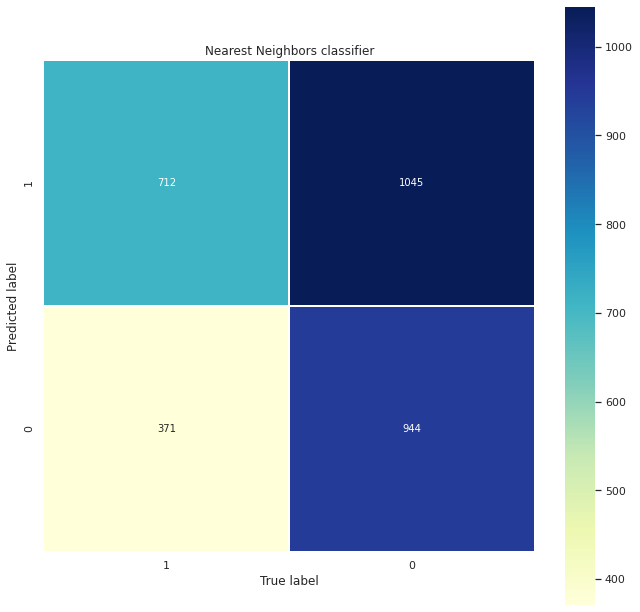

              precision    recall  f1-score   support

           1       0.41      0.66      0.50      1083
           0       0.72      0.47      0.57      1989

    accuracy                           0.54      3072
   macro avg       0.56      0.57      0.54      3072
weighted avg       0.61      0.54      0.55      3072

Classifier = Linear SVM, Score (test, accuracy) = 64.75, Training time = 17.93 seconds


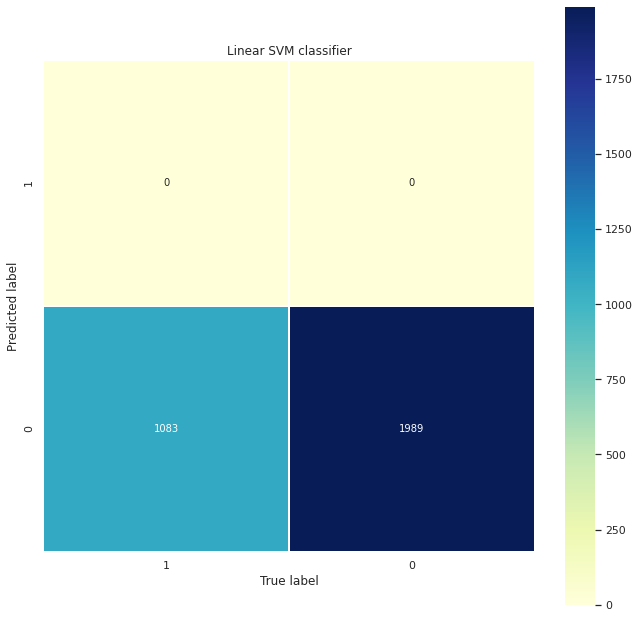

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1083
           0       0.65      1.00      0.79      1989

    accuracy                           0.65      3072
   macro avg       0.32      0.50      0.39      3072
weighted avg       0.42      0.65      0.51      3072

Classifier = RBF SVM, Score (test, accuracy) = 65.27, Training time = 23.93 seconds


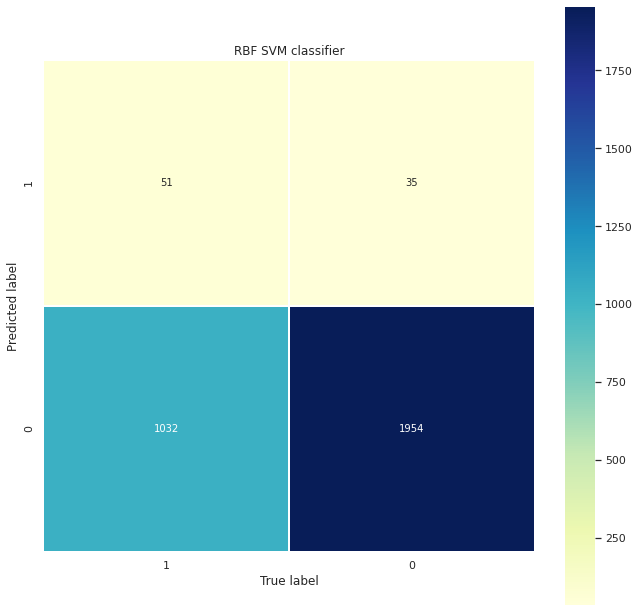

              precision    recall  f1-score   support

           1       0.59      0.05      0.09      1083
           0       0.65      0.98      0.79      1989

    accuracy                           0.65      3072
   macro avg       0.62      0.51      0.44      3072
weighted avg       0.63      0.65      0.54      3072

Classifier = Decision Tree, Score (test, accuracy) = 64.65, Training time = 0.10 seconds


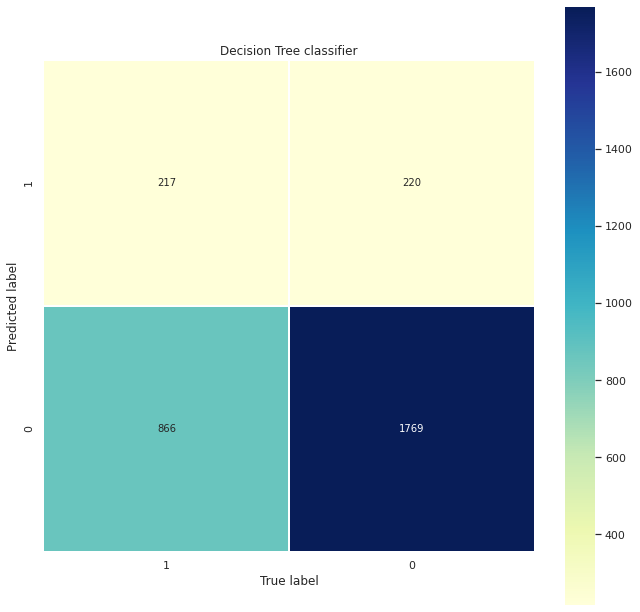

              precision    recall  f1-score   support

           1       0.50      0.20      0.29      1083
           0       0.67      0.89      0.77      1989

    accuracy                           0.65      3072
   macro avg       0.58      0.54      0.53      3072
weighted avg       0.61      0.65      0.60      3072

Classifier = Random Forest, Score (test, accuracy) = 64.75, Training time = 0.04 seconds


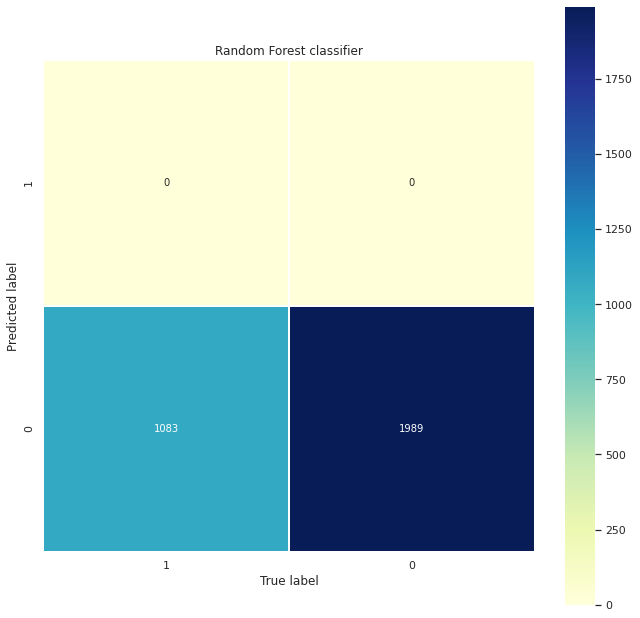

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1083
           0       0.65      1.00      0.79      1989

    accuracy                           0.65      3072
   macro avg       0.32      0.50      0.39      3072
weighted avg       0.42      0.65      0.51      3072

Classifier = Neural Net, Score (test, accuracy) = 65.27, Training time = 228.82 seconds


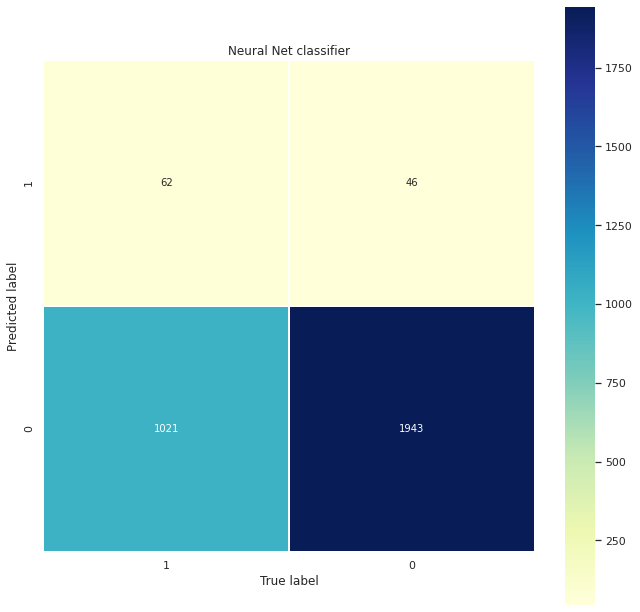

              precision    recall  f1-score   support

           1       0.57      0.06      0.10      1083
           0       0.66      0.98      0.78      1989

    accuracy                           0.65      3072
   macro avg       0.61      0.52      0.44      3072
weighted avg       0.63      0.65      0.54      3072

Classifier = AdaBoost, Score (test, accuracy) = 63.93, Training time = 1.47 seconds


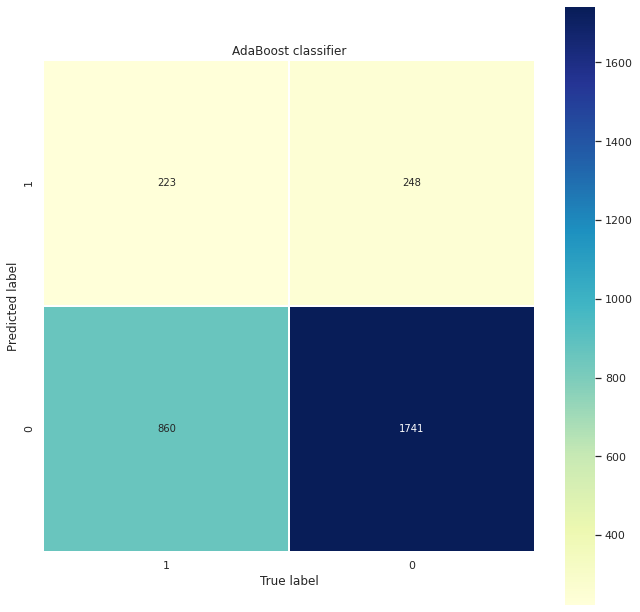

              precision    recall  f1-score   support

           1       0.47      0.21      0.29      1083
           0       0.67      0.88      0.76      1989

    accuracy                           0.64      3072
   macro avg       0.57      0.54      0.52      3072
weighted avg       0.60      0.64      0.59      3072

Classifier = Naive Bayes, Score (test, accuracy) = 64.68, Training time = 0.01 seconds


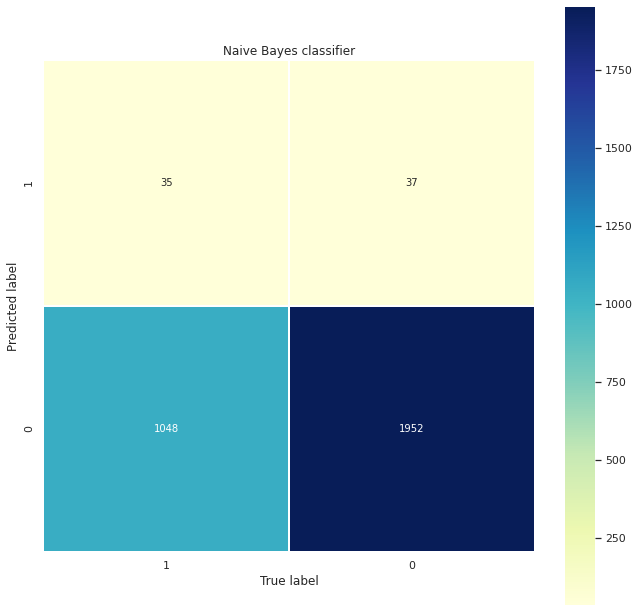

              precision    recall  f1-score   support

           1       0.49      0.03      0.06      1083
           0       0.65      0.98      0.78      1989

    accuracy                           0.65      3072
   macro avg       0.57      0.51      0.42      3072
weighted avg       0.59      0.65      0.53      3072

Classifier = XGBoost, Score (test, accuracy) = 64.49, Training time = 3.14 seconds


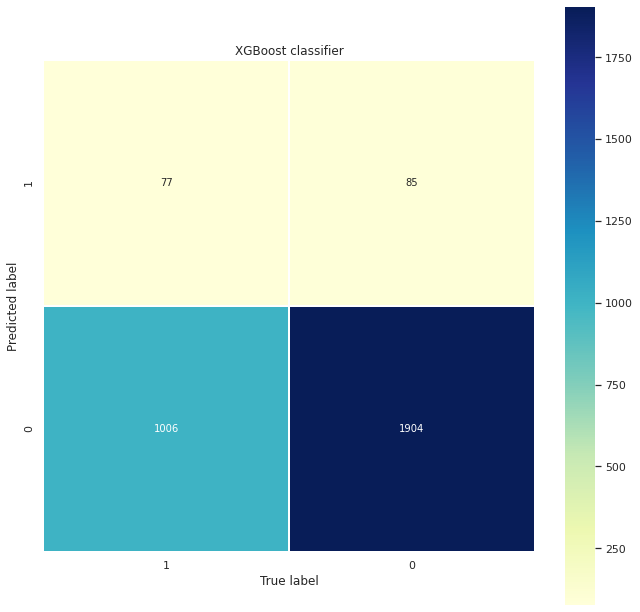

              precision    recall  f1-score   support

           1       0.48      0.07      0.12      1083
           0       0.65      0.96      0.78      1989

    accuracy                           0.64      3072
   macro avg       0.56      0.51      0.45      3072
weighted avg       0.59      0.64      0.55      3072

Classifier = LogisticRegression, Score (test, accuracy) = 66.15, Training time = 0.42 seconds


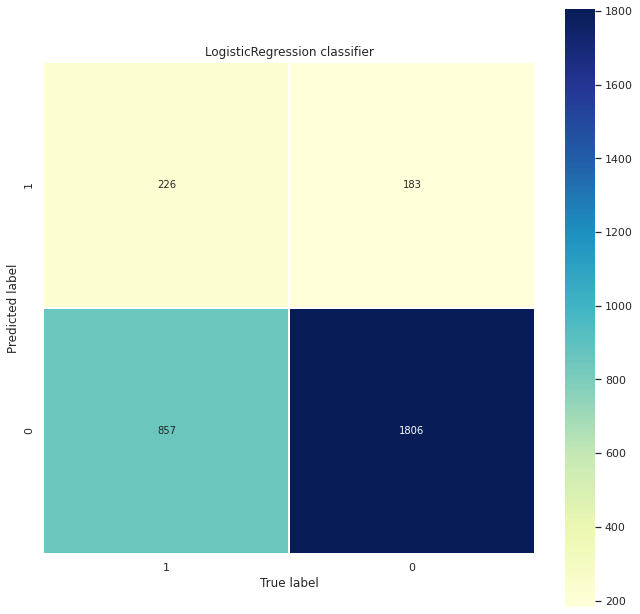

              precision    recall  f1-score   support

           1       0.55      0.21      0.30      1083
           0       0.68      0.91      0.78      1989

    accuracy                           0.66      3072
   macro avg       0.62      0.56      0.54      3072
weighted avg       0.63      0.66      0.61      3072

--------------------------------------------------------------------------------
[('Nearest Neighbors', 53.90625), ('Linear SVM', 64.74609375), ('RBF SVM', 65.26692708333334), ('Decision Tree', 64.6484375), ('Random Forest', 64.74609375), ('Neural Net', 65.26692708333334), ('AdaBoost', 63.932291666666664), ('Naive Bayes', 64.68098958333334), ('XGBoost', 64.48567708333334), ('LogisticRegression', 66.14583333333334)]
Best --> Classifier = LogisticRegression, Score (test, accuracy) = 66.15


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score,precision_score
from sklearn import  linear_model, metrics
import time
classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    MultinomialNB(),
    XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
    LogisticRegression()]

log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
max_score = 0.0
max_class = ''
accuracyScores = []
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    #start_time = datetime.datetime.now().time()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = 100.0 * clf.score(x_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    accuracyScores.append((name, score))
    mat_RFC = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(11,11))  
    ax.set_title(name + " " +"classifier")
    sns.heatmap(mat_RFC.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=ylabels,
            yticklabels=ylabels,linewidths=.5, ax=ax)
    plt.xlabel('True label')
    plt.ylabel('Predicted label');
    plt.show()

    cls_RFC = classification_report(y_test, y_pred, target_names=ylabels)
    print(cls_RFC)


    
    log_entry = pd.DataFrame([[name,score]], columns=log_cols)
    log = log.append(log_entry)

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print(accuracyScores)
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

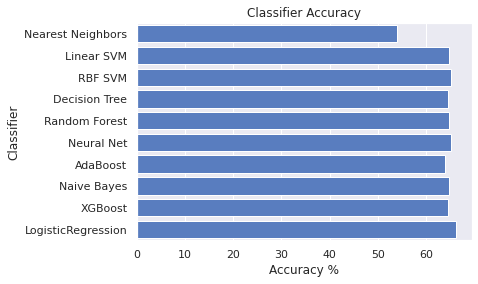

In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

Logistic Regression, Linear SVM, RBF SVM, Naive Bayes, Random Forest classifier have given highest accuracy.

###**Plotting the results of top 4 classifiers:**

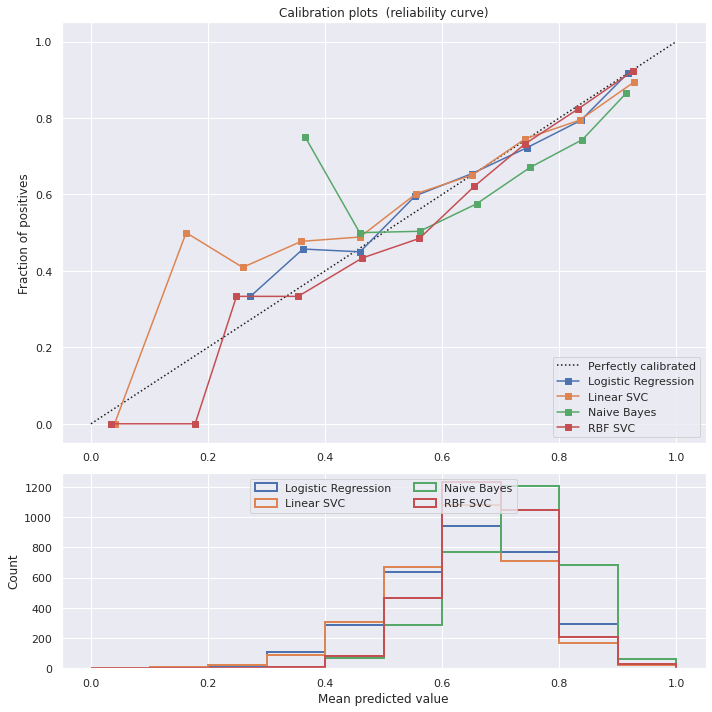

In [ ]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve


# Create classifiers
LogRegr = LogisticRegression()
linearSVC = SVC(kernel="linear", C=0.025)
nb = MultinomialNB()
rbfSvc = SVC(gamma=2, C=1)
rndmForest = RandomForestClassifier()

# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(LogRegr, 'Logistic Regression'),
                  (linearSVC,'Linear SVC'),
                  (nb,'Naive Bayes'),
                  (rbfSvc, 'RBF SVC')
                  # (rndmForest, 'Random Forest classifier')
                  ]:
    clf.fit(x_train, y_train)
    score = 100.0 * clf.score(x_test, y_test)
    if name == 'Logistic Regression':
      acc_LogisticRegression  = score
    if name == 'Linear SVC':
      acc_LinearSvc  = score
    if name == 'Naive Bayes':
      acc_NaiveBayes  = score
    if name == 'RBF SVC':
      acc_rbfSvc  = score     
    # if name == 'Random Forest Classifier':
    #   acc_rndmForest  = score
      
    
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(x_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(x_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear SVC', 'Naive Bayes', 'RBF SVC' #'Random Forest Classifier'
              ],
    'Score': [acc_LogisticRegression, acc_LinearSvc, acc_NaiveBayes, acc_rbfSvc #acc_rndmForest
              ]})
models.sort_values(by='Score', ascending=False)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [ ]:
import pickle
filename =  'BeforeAmalgamation_SpamModel.sav'
pickle.dump(clf_best, open(filename, 'wb'))

#load model from the disk
loaded_model = pickle.load(open(filename, 'rb'))

#Load the saved model and evaluating accuracy
result = loaded_model.score(x_test, y_test)
print(result)

0.6614583333333334


##Data Enrichment- Amalgamation with Dataset 2 (real or fake news dataset)

Getting fake news dataset

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1Wm4kooUj_KlN7PJ_ERHBh08n7LtOoTP4'}) # replace the id with id of file you want to access
downloaded.GetContentFile('news.csv')

In [ ]:
fakeReal_news = pd.read_csv("news.csv")

In [ ]:
fakeReal_news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
fakeReal_news['message'] = fakeReal_news['title'] +" "+ fakeReal_news['text']
fakeReal_news['class_label'] = fakeReal_news['label'] .map({'FAKE': 1, 'REAL': 0})

In [ ]:
fakeReal_news

,Unnamed: 0,title,text,label,message,class_label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...,0
...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,State Department says it can't find emails fro...,0
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...,1
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,"In Ethiopia, Obama seeks progress on peace, se...",0


In [ ]:
fakeReal_news['SpamHam'] = fakeReal_news['class_label'] .map({0: 'ham', 1: 'spam'})

In [ ]:
fakeReal_news

,Unnamed: 0,title,text,label,message,class_label,SpamHam
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,1,spam
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,1,spam
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,0,ham
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,1,spam
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...,0,ham
...,...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,State Department says it can't find emails fro...,0,ham
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,spam
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...,1,spam
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,"In Ethiopia, Obama seeks progress on peace, se...",0,ham


In [ ]:
cols1 = ['message','class_label', 'SpamHam']
fakeReal_news[cols1]



,message,class_label,SpamHam
0,You Can Smell Hillary’s Fear Daniel Greenfield...,1,spam
1,Watch The Exact Moment Paul Ryan Committed Pol...,1,spam
2,Kerry to go to Paris in gesture of sympathy U....,0,ham
3,Bernie supporters on Twitter erupt in anger ag...,1,spam
4,The Battle of New York: Why This Primary Matte...,0,ham
...,...,...,...
6330,State Department says it can't find emails fro...,0,ham
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,spam
6332,Anti-Trump Protesters Are Tools of the Oligarc...,1,spam
6333,"In Ethiopia, Obama seeks progress on peace, se...",0,ham


In [ ]:
train_news['message'] = train_news['headline_text']
train_news

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,class_label,SpamHam,message_len,message
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,1,spam,82,Says the Annies List political group supports ...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1,spam,141,When did the decline of coal start? It started...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,0,ham,105,"Hillary Clinton agrees with John McCain ""by vo..."
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,1,spam,78,Health care reform legislation is likely to ma...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1,spam,54,The economic turnaround started at the end of ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""",0,ham,90,There are a larger number of shark attacks in ...
10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview,0,ham,78,Democrats have now become the party of the [At...
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,1,spam,176,Says an alternative to Social Security that op...
10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,1,spam,62,On lifting the U.S. Cuban embargo and allowing...


In [ ]:
AmalgamatedData1 = pd.DataFrame()

In [ ]:
df1 = fakeReal_news[cols1]
df2 = train_news[cols1]
frames = [df1, df2]
AmalgamatedData1 = pd.concat(frames)

In [ ]:
AmalgamatedData1['message_len'] = train_news.message.apply(len)
AmalgamatedData1.head()

,message,class_label,SpamHam,message_len
0,You Can Smell Hillary’s Fear Daniel Greenfield...,1,spam,82
1,Watch The Exact Moment Paul Ryan Committed Pol...,1,spam,141
2,Kerry to go to Paris in gesture of sympathy U....,0,ham,105
3,Bernie supporters on Twitter erupt in anger ag...,1,spam,78
4,The Battle of New York: Why This Primary Matte...,0,ham,54


Text(0.5, 0, 'Message Length')

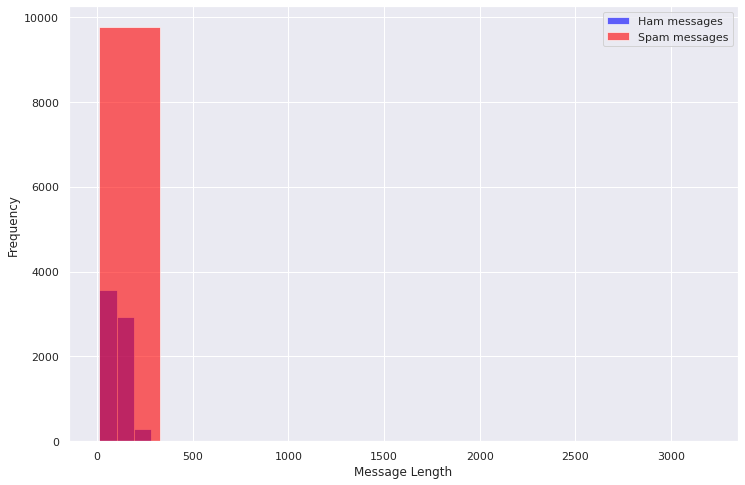

In [ ]:
plt.figure(figsize=(12, 8))

AmalgamatedData1[AmalgamatedData1.SpamHam=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
AmalgamatedData1[AmalgamatedData1.SpamHam=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [ ]:
AmalgamatedData1.SpamHam.value_counts()

spam    9766
ham     6809
Name: SpamHam, dtype: int64

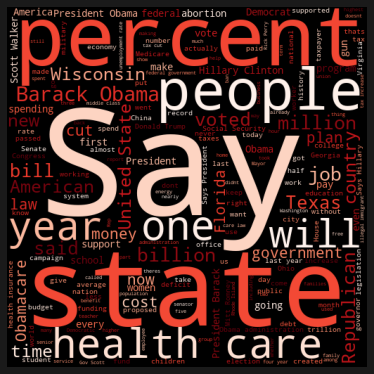

In [ ]:
from wordcloud import WordCloud
spamWords1 = ' '.join(list(AmalgamatedData1[AmalgamatedData1.class_label== 1]['message']))
spam_cloud1 = WordCloud(width = 512,height = 512,background_color = "black", colormap="Reds").generate(spamWords)
plt.figure(figsize = (5, 5), facecolor = 'k')
plt.imshow(spam_cloud1)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

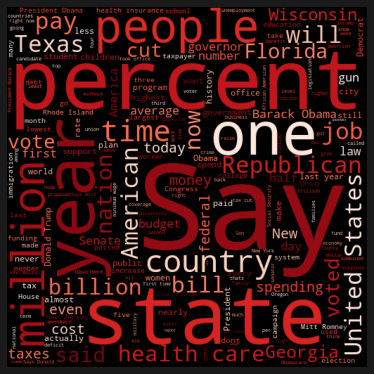

In [ ]:
from wordcloud import WordCloud
spamWords2 = ' '.join(list(AmalgamatedData1[AmalgamatedData1.class_label== 0]['message']))
spam_cloud2 = WordCloud(width = 512,height = 512,background_color = "black", colormap="Reds").generate(hamWords)
plt.figure(figsize = (5, 5), facecolor = 'k')
plt.imshow(spam_cloud2)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
AmalgamatedData1.head()

,message,class_label,SpamHam,message_len
0,You Can Smell Hillary’s Fear Daniel Greenfield...,1,spam,82
1,Watch The Exact Moment Paul Ryan Committed Pol...,1,spam,141
2,Kerry to go to Paris in gesture of sympathy U....,0,ham,105
3,Bernie supporters on Twitter erupt in anger ag...,1,spam,78
4,The Battle of New York: Why This Primary Matte...,0,ham,54


###**Applying Muller loop after amalgamation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes",
         "XGBoost","LogisticRegression"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(AmalgamatedData1['message'], AmalgamatedData1['class_label'], test_size = 0.3, random_state = 0)
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(X_train)
x_test = vectorizer.transform(X_test)
# x_train = np.array(x_train)
# y_train = np.array(y_train)
# x_test = np.array(x_test)
# y_test_np = np.array(y_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11602, 59500)
(4973, 59500)
(11602,)
(4973,)


In [ ]:
ylabel = AmalgamatedData1['class_label'].unique()
ylabels=["1" if x == 1 else "0" for x in ylabel]
ylabels

['1', '0']

Classifier = Nearest Neighbors, Score (test, accuracy) = 60.31, Training time = 10.31 seconds


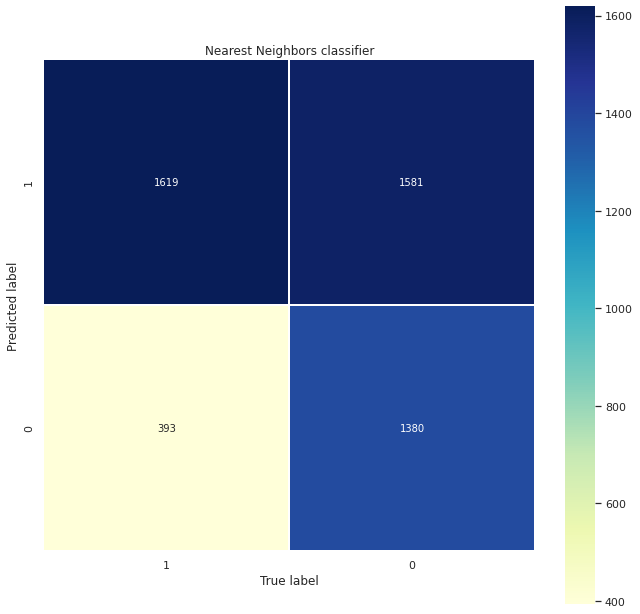

              precision    recall  f1-score   support

           1       0.51      0.80      0.62      2012
           0       0.78      0.47      0.58      2961

    accuracy                           0.60      4973
   macro avg       0.64      0.64      0.60      4973
weighted avg       0.67      0.60      0.60      4973

Classifier = Linear SVM, Score (test, accuracy) = 70.10, Training time = 275.20 seconds


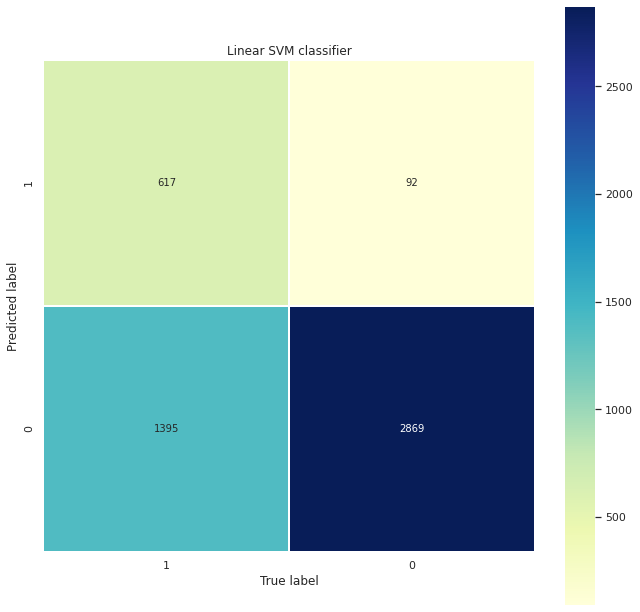

              precision    recall  f1-score   support

           1       0.87      0.31      0.45      2012
           0       0.67      0.97      0.79      2961

    accuracy                           0.70      4973
   macro avg       0.77      0.64      0.62      4973
weighted avg       0.75      0.70      0.66      4973

Classifier = RBF SVM, Score (test, accuracy) = 74.80, Training time = 450.75 seconds


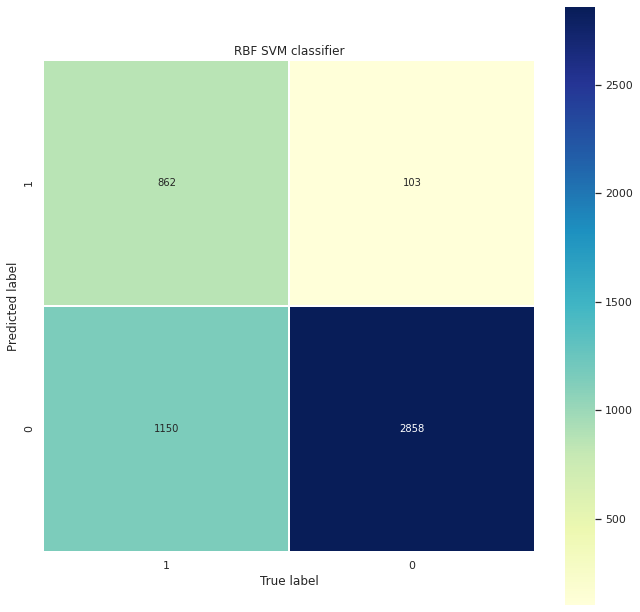

              precision    recall  f1-score   support

           1       0.89      0.43      0.58      2012
           0       0.71      0.97      0.82      2961

    accuracy                           0.75      4973
   macro avg       0.80      0.70      0.70      4973
weighted avg       0.79      0.75      0.72      4973

Classifier = Decision Tree, Score (test, accuracy) = 69.70, Training time = 1.65 seconds


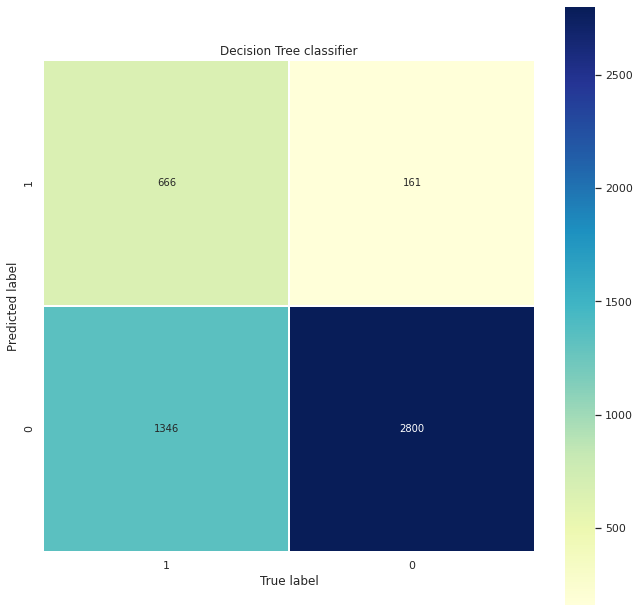

              precision    recall  f1-score   support

           1       0.81      0.33      0.47      2012
           0       0.68      0.95      0.79      2961

    accuracy                           0.70      4973
   macro avg       0.74      0.64      0.63      4973
weighted avg       0.73      0.70      0.66      4973

Classifier = Random Forest, Score (test, accuracy) = 59.54, Training time = 0.18 seconds


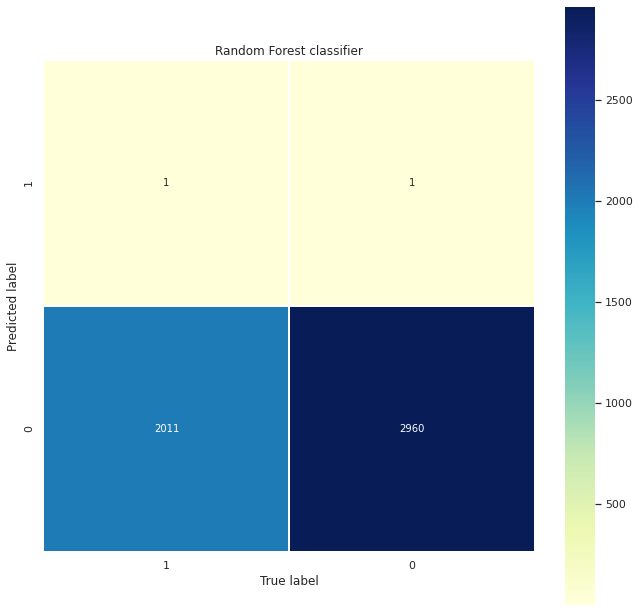

              precision    recall  f1-score   support

           1       0.50      0.00      0.00      2012
           0       0.60      1.00      0.75      2961

    accuracy                           0.60      4973
   macro avg       0.55      0.50      0.37      4973
weighted avg       0.56      0.60      0.44      4973

Classifier = Neural Net, Score (test, accuracy) = 68.05, Training time = 1373.54 seconds


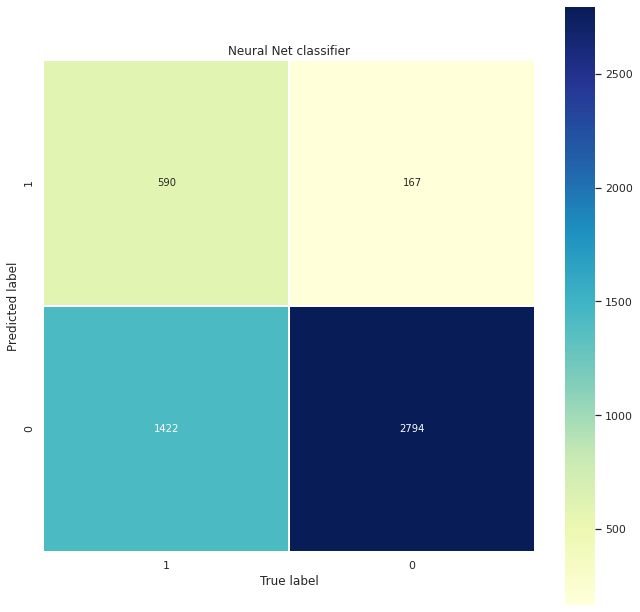

              precision    recall  f1-score   support

           1       0.78      0.29      0.43      2012
           0       0.66      0.94      0.78      2961

    accuracy                           0.68      4973
   macro avg       0.72      0.62      0.60      4973
weighted avg       0.71      0.68      0.64      4973

Classifier = AdaBoost, Score (test, accuracy) = 71.12, Training time = 15.24 seconds


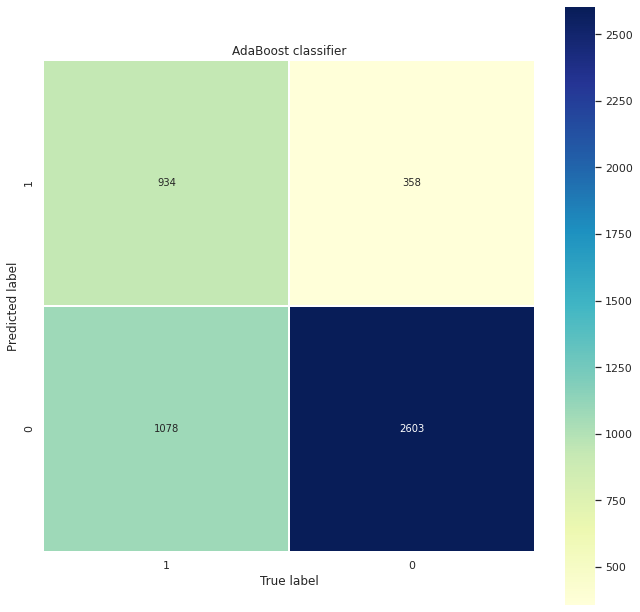

              precision    recall  f1-score   support

           1       0.72      0.46      0.57      2012
           0       0.71      0.88      0.78      2961

    accuracy                           0.71      4973
   macro avg       0.72      0.67      0.67      4973
weighted avg       0.71      0.71      0.70      4973

Classifier = Naive Bayes, Score (test, accuracy) = 72.65, Training time = 0.03 seconds


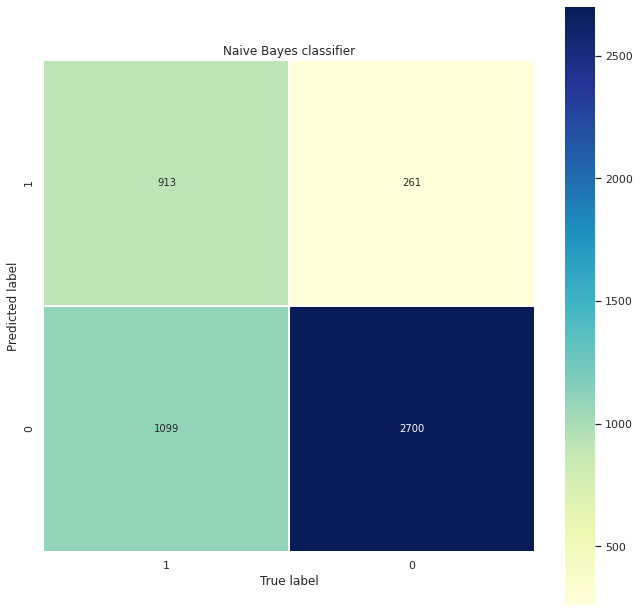

              precision    recall  f1-score   support

           1       0.78      0.45      0.57      2012
           0       0.71      0.91      0.80      2961

    accuracy                           0.73      4973
   macro avg       0.74      0.68      0.69      4973
weighted avg       0.74      0.73      0.71      4973

Classifier = XGBoost, Score (test, accuracy) = 73.38, Training time = 27.44 seconds


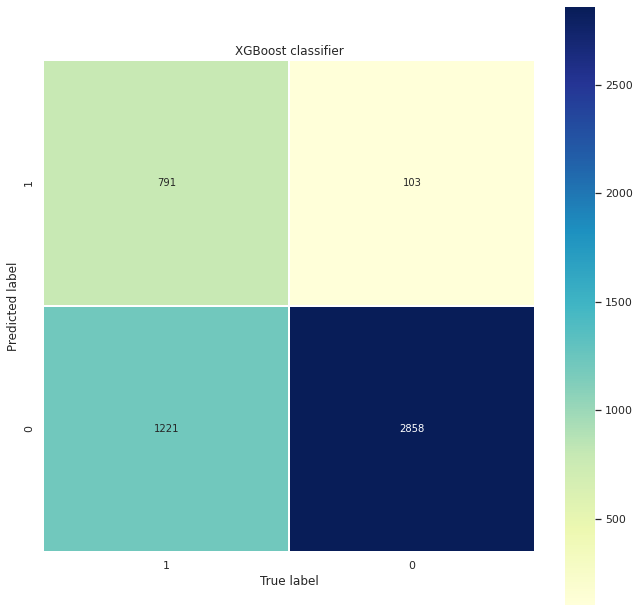

              precision    recall  f1-score   support

           1       0.88      0.39      0.54      2012
           0       0.70      0.97      0.81      2961

    accuracy                           0.73      4973
   macro avg       0.79      0.68      0.68      4973
weighted avg       0.78      0.73      0.70      4973

Classifier = LogisticRegression, Score (test, accuracy) = 74.18, Training time = 1.03 seconds


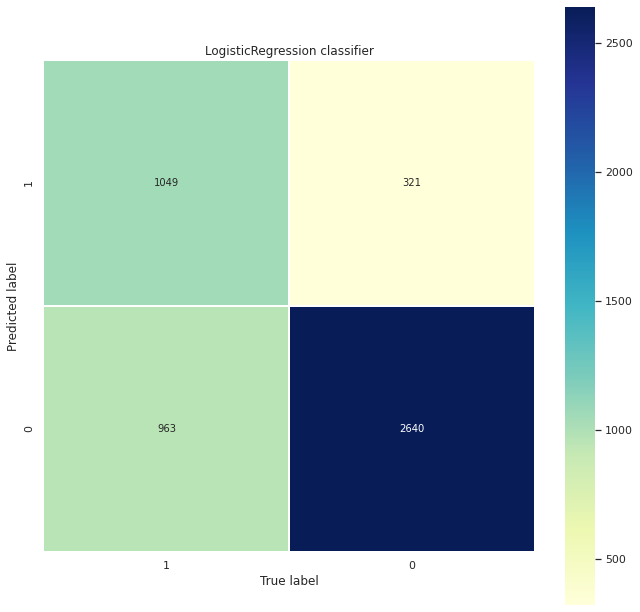

              precision    recall  f1-score   support

           1       0.77      0.52      0.62      2012
           0       0.73      0.89      0.80      2961

    accuracy                           0.74      4973
   macro avg       0.75      0.71      0.71      4973
weighted avg       0.75      0.74      0.73      4973

--------------------------------------------------------------------------------
[('Nearest Neighbors', 60.30565051276895), ('Linear SVM', 70.09853207319526), ('RBF SVM', 74.80394128292781), ('Decision Tree', 69.69636034586767), ('Random Forest', 59.541524230846576), ('Neural Net', 68.04745626382466), ('AdaBoost', 71.12406997788055), ('Naive Bayes', 72.65232254172531), ('XGBoost', 73.37623165091493), ('LogisticRegression', 74.18057510557009)]
Best --> Classifier = RBF SVM, Score (test, accuracy) = 74.80


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score,precision_score
from sklearn import  linear_model, metrics
import time
classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    MultinomialNB(),
    XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
    LogisticRegression()]

log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
max_score = 0.0
max_class = ''
accuracyScores = []
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    #start_time = datetime.datetime.now().time()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = 100.0 * clf.score(x_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    accuracyScores.append((name, score))
    mat_RFC = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(11,11))  
    ax.set_title(name + " " +"classifier")
    sns.heatmap(mat_RFC.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=ylabels,
            yticklabels=ylabels,linewidths=.5, ax=ax)
    plt.xlabel('True label')
    plt.ylabel('Predicted label');
    plt.show()

    cls_RFC = classification_report(y_test, y_pred, target_names=ylabels)
    print(cls_RFC)


    
    log_entry = pd.DataFrame([[name,score]], columns=log_cols)
    log = log.append(log_entry)

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print(accuracyScores)
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

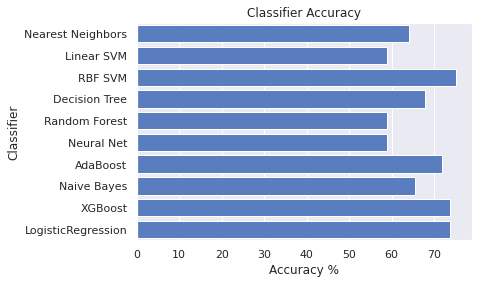

In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

Logistic Regression, Linear SVM, RBF SVM, Naive Bayes, Random Forest classifier have given highest accuracy.

##**Pickle and load**

In [ ]:
class spamPipelineSVM(object):
  def __init__(self, spam_dataset):
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import  LogisticRegression
    from sklearn import metrics
    from sklearn.pipeline import Pipeline

    self.RbfSvm_pipeline = Pipeline([
        ('RbfSvmCV', vectorizer),
        ('RbfSvm_clf',SVC(gamma=2, C=1, probability= True))
        ])
    
    self.RbfSvm_pipeline.fit(X_train,y_train)
    predicted_RbfSvm = self.RbfSvm_pipeline.predict(X_test)
    predictions = self.RbfSvm_pipeline.predict_proba(X_test)[:,1]
    score = metrics.accuracy_score(y_test, predicted_RbfSvm)
    prob_score_diff = predictions[1] - predictions[0]
    print(prob_score_diff)
    print("Spam classifier Trained - accuracy:   %0.6f" % score)

In [ ]:
spampipelineRbfSvmObj = spamPipelineSVM(AmalgamatedData1)

0.10679619104053328
Spam classifier Trained - accuracy:   0.748039


In [ ]:
import pickle
filename =  'FirstAmalgamation_SpamModel.sav'
pickle.dump(clf_best, open(filename, 'wb'))

#load model from the disk
loaded_model = pickle.load(open(filename, 'rb'))

#Load the saved model and evaluating accuracy
result = loaded_model.score(x_test, y_test)
print(result)

0.750854614920571


In [ ]:
class spamPipeline(object):
  def __init__(self, spam_dataset):
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import  LogisticRegression
    from sklearn import metrics
    from sklearn.pipeline import Pipeline

    self.logR_pipeline = Pipeline([
        ('LogRCV', vectorizer),
        ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
        ])
    
    self.logR_pipeline.fit(X_train,y_train)
    predicted_LogR = self.logR_pipeline.predict(X_test)
    predictions = self.logR_pipeline.predict_proba(X_test)[:,1]
    score = metrics.accuracy_score(y_test, predicted_LogR)
    prob_score_diff = predictions[1] - predictions[0]
    print(prob_score_diff)
    print("Spam classifier Trained - accuracy:   %0.6f" % score)

In [ ]:
spampipelineObj = spamPipeline(AmalgamatedData1)

-0.43459393088076004
Spam classifier Trained - accuracy:   0.727931


## **Amalgamation with Dataset 3 - Web Scraping**

**Web-Scraping from Politifact website using Beautiful Soup.**

https://www.politifact.com/personalities/bernie-sanders/

In [ ]:
pip install selenium

     |████████████████████████████████| 911kB 5.5MB/s 


In [ ]:
pip install prettify

  Created wheel for prettify: filename=prettify-0.1.1-cp36-none-any.whl size=8424 sha256=222d25e8d6f8528d18bff5df386ce99835d328aa380cc66f0511dd52b20bd645
  Stored in directory: /root/.cache/pip/wheels/49/44/c3/f997cb138383a4a0399a6b2f75012746c533a24ff6b02fafe0
Successfully built prettify


In [ ]:
pip install htmltext

In [ ]:
import os
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import sys
import numpy as np
import pandas as pd
import regex as re
import requests
import lxml
from lxml.html.soupparser import fromstring
import prettify
import numbers
import htmltext 

In [ ]:
#set some display settings for notebooks
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
#add headers in case you use chromedriver (captchas are no fun); namely used for chromedriver
req_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
}

Scrapped data from the below link that has "LIST OF LATEST FACT-CHECKS OF BERNIE SANDERS". 'https://www.politifact.com/factchecks/list/?speaker=bernie-sanders'

In [ ]:
page_link = 'https://www.politifact.com/factchecks/list/?speaker=bernie-sanders'
# page_link = 'https://www.ofm.wa.gov/washington-data-research/statewide-data/washington-trends/economic-trends/median-home-price'
page_response = requests.get(page_link, timeout=5)
# here, we fetch the content from the url, using the requests library
page_content = BeautifulSoup(page_response.content, "html.parser")
#we use the html parser to parse the url content and store it in a variable.
print(page_content)


<!DOCTYPE html>

<html dir="ltr" lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title> | PolitiFact </title>
<meta content="PolitiFact is a fact-checking website that rates the accuracy of claims by elected officials and others on its Truth-O-Meter." name="description">
<meta content="PolitiFact" name="twitter:username">
<meta content="summary" name="twitter:card">
<meta content="PolitiFact" name="twitter:site"/>
<meta content="" name="twitter:url">
<meta content="" name="twitter:title"/>
<meta content="PolitiFact is a fact-checking website that rates the accuracy of claims by elected officials and others on its Truth-O-Meter." name="twitter:description"/>
<meta content="" name="twitter:image"/>
<link href="https://static.politifact.com/images/favicon.ico" rel="shortcut icon" type="image/ico"/>
<link href="https://static.politifact.com/images/favicon.png" rel="ic

In [ ]:
data = []
AllArticles = page_content.find_all('div', attrs={'class':'m-statement__quote'})



rows = AllArticles
for row in rows:
    cols = row.find_all('a')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values
    


In [ ]:
ScrapedData = pd.DataFrame()

In [ ]:
messageData = []
for arr in range(0,len(data)):
  stringVal = (str(data[arr])).replace("['","")
  stringUpdated = stringVal.replace("']","")
  messageData.append(stringUpdated)

In [ ]:
messageData

['“It has been estimated that only 12% of workers in businesses that are likely to stay open during this crisis are receiving paid sick leave benefits as a result of the second coronavirus relief package."',
 'Says a 2007 immigration bill “was opposed by (the League of United Latin American Citizens), the largest Latino organization in America. The Southern Poverty Law Center called its guest-worker programs akin to slavery. … And you know who voted with me on that one, Joe? Barack Obama.”',
 'Says Joe Biden "has advocated cutting Social Security for 40 years"',
 '“Trade agreements like NAFTA and permanent normal trade relations with China, which forced American workers to compete against people making pennies an hour, has resulted in the loss of 160,000 jobs here in Michigan."',
 '"If you look at California, if you look at people of color in general, African-Americans, Latinos, Asian-Americans, we won that big time. Big time. Not even close.”',
 'Says Democratic members of Congress wh

In [ ]:
ScrapedData['message'] = messageData

In [ ]:
with requests.Session() as s:
  r = s.get(page_link, headers=req_headers)
  soup = BeautifulSoup(r.content, 'html.parser')

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [ ]:
data1 = []
data2 = []
stated = page_content.find_all('div', attrs={'class':'c-image'})
stated

rows = stated
for row in rows:
    data1.append(row.find('img', attrs={'class':'c-image__thumb', 'width':'219'}))
for col in range(len(data1)):
  if data1[col] is not None:
    # print(data1[col])
    string = (str(data1[col]))
    # print(string)
    string1 = string[10: 24]
    string2 =string1[0:string1.index('"')]
    # print(string2)
    data2.append(string2)








In [ ]:
data2

['mostly-true',
 'half-true',
 'barely-true',
 'mostly-true',
 'half-true',
 'half-true',
 'mostly-true',
 'barely-true',
 'mostly-true',
 'half-true',
 'barely-true',
 'mostly-true',
 'mostly-true',
 'half-true',
 'true',
 'false',
 'false',
 'true',
 'half-true',
 'mostly-true',
 'barely-true',
 'half-true',
 'mostly-true',
 'half-true',
 'half-true',
 'half-true',
 'barely-true',
 'mostly-true',
 'false',
 'mostly-true']

In [ ]:
ScrapedData['label'] = data2
ScrapedData

,message,label
0,“It has been estimated that only 12% of worker...,mostly-true
1,Says a 2007 immigration bill “was opposed by (...,half-true
2,"Says Joe Biden ""has advocated cutting Social S...",barely-true
3,“Trade agreements like NAFTA and permanent nor...,mostly-true
4,"""If you look at California, if you look at peo...",half-true
5,Says Democratic members of Congress who repres...,half-true
6,“Mike Bloomberg owns more wealth than the bott...,mostly-true
7,“(A recent study) said ‘Medicare for All’ will...,barely-true
8,"“When Fidel Castro came into office, you know ...",mostly-true
9,“Pete Buttigieg is a favorite candidate of Wal...,half-true


In [ ]:
ScrapedData['class_label'] = ScrapedData['label'] .map({'true': 0, 'mostly-true':0, 'false':1, 'half-true':1, 'barely-true':1, 'pants-fire':1})


In [ ]:
ScrapedData.head()

,message,label,class_label
0,“It has been estimated that only 12% of worker...,mostly-true,0
1,Says a 2007 immigration bill “was opposed by (...,half-true,1
2,"Says Joe Biden ""has advocated cutting Social S...",barely-true,1
3,“Trade agreements like NAFTA and permanent nor...,mostly-true,0
4,"""If you look at California, if you look at peo...",half-true,1


In [ ]:
ScrapedData['SpamHam'] = ScrapedData['class_label'] .map({0: 'ham', 1: 'spam'})

In [ ]:
ScrapedData

,message,label,class_label,SpamHam
0,“It has been estimated that only 12% of worker...,mostly-true,0,ham
1,Says a 2007 immigration bill “was opposed by (...,half-true,1,spam
2,"Says Joe Biden ""has advocated cutting Social S...",barely-true,1,spam
3,“Trade agreements like NAFTA and permanent nor...,mostly-true,0,ham
4,"""If you look at California, if you look at peo...",half-true,1,spam
5,Says Democratic members of Congress who repres...,half-true,1,spam
6,“Mike Bloomberg owns more wealth than the bott...,mostly-true,0,ham
7,“(A recent study) said ‘Medicare for All’ will...,barely-true,1,spam
8,"“When Fidel Castro came into office, you know ...",mostly-true,0,ham
9,“Pete Buttigieg is a favorite candidate of Wal...,half-true,1,spam


In [ ]:
cols2 = ['message','class_label', 'SpamHam']
ScrapedData[cols2]

,message,class_label,SpamHam
0,“It has been estimated that only 12% of worker...,0,ham
1,Says a 2007 immigration bill “was opposed by (...,1,spam
2,"Says Joe Biden ""has advocated cutting Social S...",1,spam
3,“Trade agreements like NAFTA and permanent nor...,0,ham
4,"""If you look at California, if you look at peo...",1,spam
5,Says Democratic members of Congress who repres...,1,spam
6,“Mike Bloomberg owns more wealth than the bott...,0,ham
7,“(A recent study) said ‘Medicare for All’ will...,1,spam
8,"“When Fidel Castro came into office, you know ...",0,ham
9,“Pete Buttigieg is a favorite candidate of Wal...,1,spam


In [ ]:
df3 = AmalgamatedData1[cols1]
df4 = ScrapedData[cols2]
frames1 = [df3, df4]
AmalgamatedData2 = pd.concat(frames1)

In [ ]:
AmalgamatedData2

,message,class_label,SpamHam
0,You Can Smell Hillary’s Fear Daniel Greenfield...,1,spam
1,Watch The Exact Moment Paul Ryan Committed Pol...,1,spam
2,Kerry to go to Paris in gesture of sympathy U....,0,ham
3,Bernie supporters on Twitter erupt in anger ag...,1,spam
4,The Battle of New York: Why This Primary Matte...,0,ham
...,...,...,...
25,"""There are more assault rifles, as I understan...",1,spam
26,"With Medicare for All, ""study after study has ...",1,spam
27,"""In 2014 ... in McDowell County, W.Va., one of...",0,ham
28,"""42 percent of (Walmart’s) associates are black.""",1,spam


In [ ]:
AmalgamatedData3 = pd.DataFrame()

In [ ]:
cols3 = ['message','class_label']
AmalgamatedData3 = AmalgamatedData2[cols3]

In [ ]:
# AmalgamatedData2.to_csv('/content/drive/My Drive/ML/AlternusVera/AmalgamatedDataUpdated.csv')

In [ ]:
# fakeReal_news

,message,class_label,SpamHam
0,You Can Smell Hillary’s Fear Daniel Greenfield...,1,spam
1,Watch The Exact Moment Paul Ryan Committed Pol...,1,spam
2,Kerry to go to Paris in gesture of sympathy U....,0,ham
3,Bernie supporters on Twitter erupt in anger ag...,1,spam
4,The Battle of New York: Why This Primary Matte...,0,ham
...,...,...,...
6330,State Department says it can't find emails fro...,0,ham
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,spam
6332,Anti-Trump Protesters Are Tools of the Oligarc...,1,spam
6333,"In Ethiopia, Obama seeks progress on peace, se...",0,ham


In [ ]:
# fakeReal_news.to_csv('/content/drive/My Drive/ML/AlternusVera/fakeNewsSpamDataset.csv')

### **Applying all classifiers using MullerLoop**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes",
         "XGBoost","LogisticRegression"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(AmalgamatedData3['message'], AmalgamatedData3['class_label'], test_size = 0.3, random_state = 0)
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(X_train)
x_test = vectorizer.transform(X_test)
# x_train = np.array(x_train)
# y_train = np.array(y_train)
# x_test = np.array(x_test)
# y_test_np = np.array(y_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11623, 59394)
(4982, 59394)
(11623,)
(4982,)


In [ ]:
ylabel = train_news['class_label'].unique()
ylabels=["1" if x == 1 else "0" for x in ylabel]
ylabels

['1', '0']

Classifier = Nearest Neighbors, Score (test, accuracy) = 59.94, Training time = 10.09 seconds


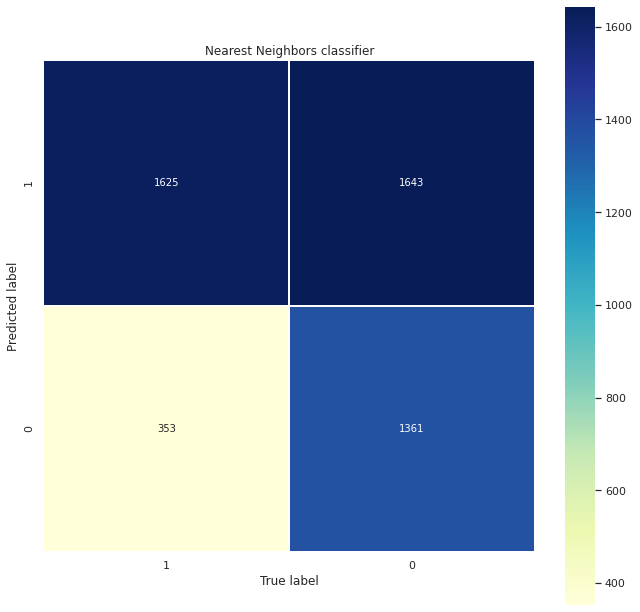

              precision    recall  f1-score   support

           1       0.50      0.82      0.62      1978
           0       0.79      0.45      0.58      3004

    accuracy                           0.60      4982
   macro avg       0.65      0.64      0.60      4982
weighted avg       0.68      0.60      0.59      4982

Classifier = Linear SVM, Score (test, accuracy) = 71.00, Training time = 283.36 seconds


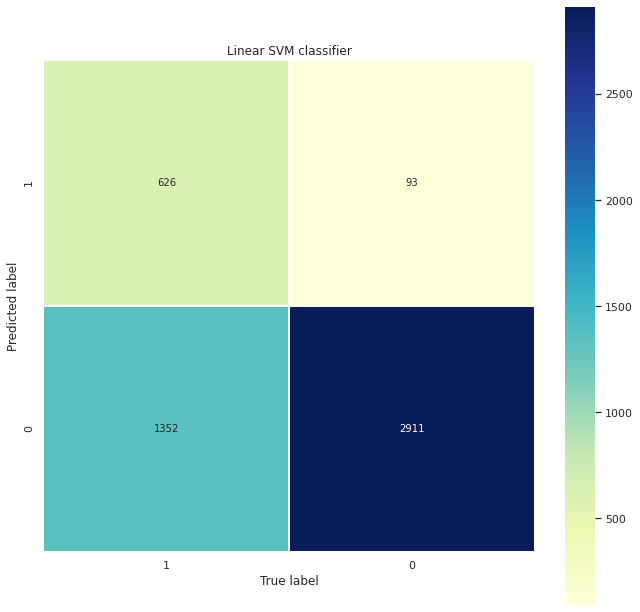

              precision    recall  f1-score   support

           1       0.87      0.32      0.46      1978
           0       0.68      0.97      0.80      3004

    accuracy                           0.71      4982
   macro avg       0.78      0.64      0.63      4982
weighted avg       0.76      0.71      0.67      4982

Classifier = RBF SVM, Score (test, accuracy) = 75.53, Training time = 486.09 seconds


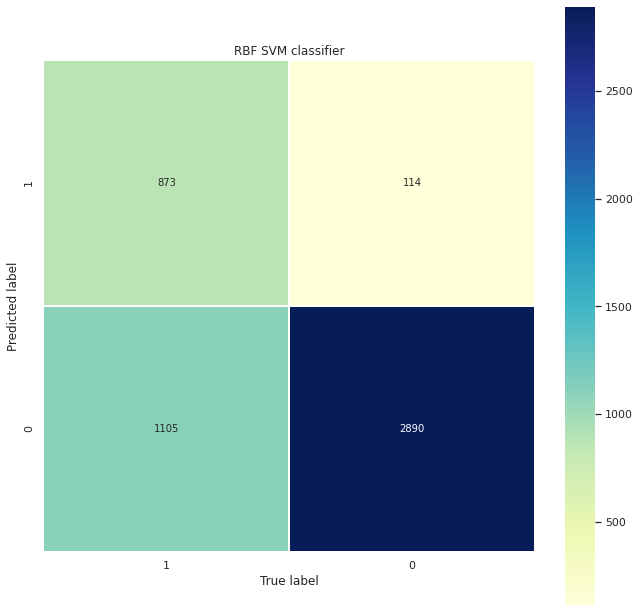

              precision    recall  f1-score   support

           1       0.88      0.44      0.59      1978
           0       0.72      0.96      0.83      3004

    accuracy                           0.76      4982
   macro avg       0.80      0.70      0.71      4982
weighted avg       0.79      0.76      0.73      4982

Classifier = Decision Tree, Score (test, accuracy) = 69.75, Training time = 1.59 seconds


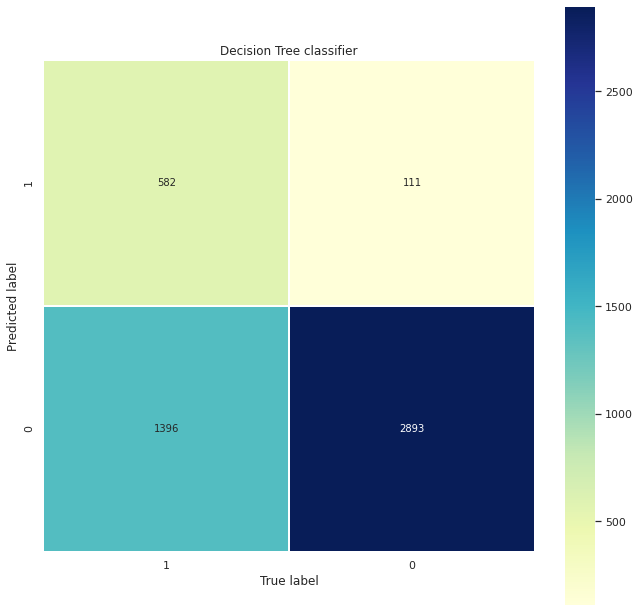

              precision    recall  f1-score   support

           1       0.84      0.29      0.44      1978
           0       0.67      0.96      0.79      3004

    accuracy                           0.70      4982
   macro avg       0.76      0.63      0.61      4982
weighted avg       0.74      0.70      0.65      4982

Classifier = Random Forest, Score (test, accuracy) = 60.38, Training time = 0.19 seconds


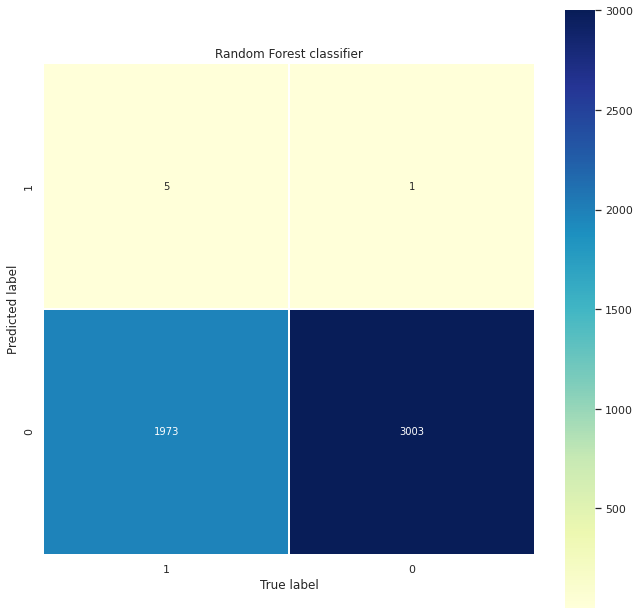

              precision    recall  f1-score   support

           1       0.83      0.00      0.01      1978
           0       0.60      1.00      0.75      3004

    accuracy                           0.60      4982
   macro avg       0.72      0.50      0.38      4982
weighted avg       0.69      0.60      0.46      4982

Classifier = Neural Net, Score (test, accuracy) = 73.44, Training time = 2254.29 seconds


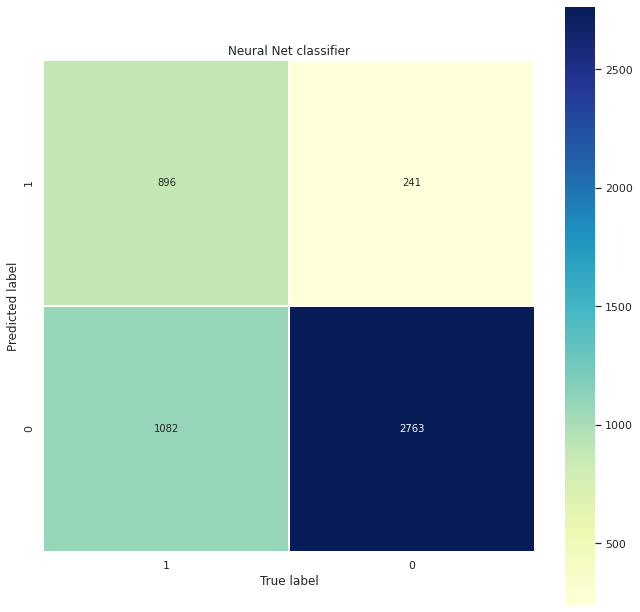

              precision    recall  f1-score   support

           1       0.79      0.45      0.58      1978
           0       0.72      0.92      0.81      3004

    accuracy                           0.73      4982
   macro avg       0.75      0.69      0.69      4982
weighted avg       0.75      0.73      0.71      4982

Classifier = AdaBoost, Score (test, accuracy) = 72.72, Training time = 15.43 seconds


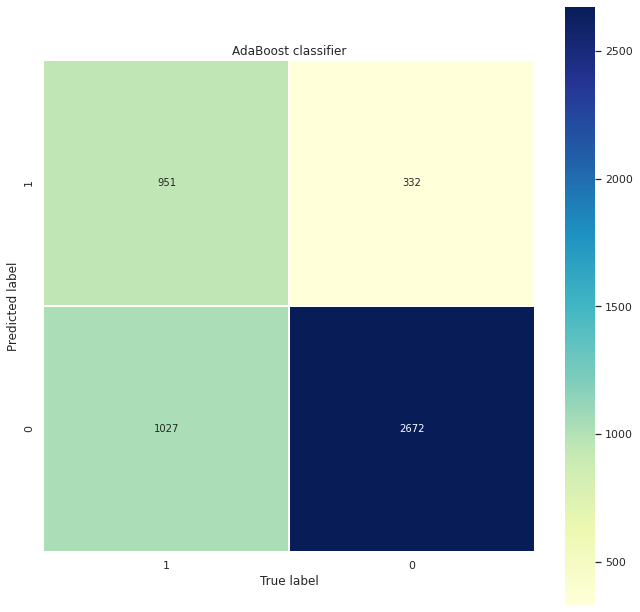

              precision    recall  f1-score   support

           1       0.74      0.48      0.58      1978
           0       0.72      0.89      0.80      3004

    accuracy                           0.73      4982
   macro avg       0.73      0.69      0.69      4982
weighted avg       0.73      0.73      0.71      4982

Classifier = Naive Bayes, Score (test, accuracy) = 73.65, Training time = 0.04 seconds


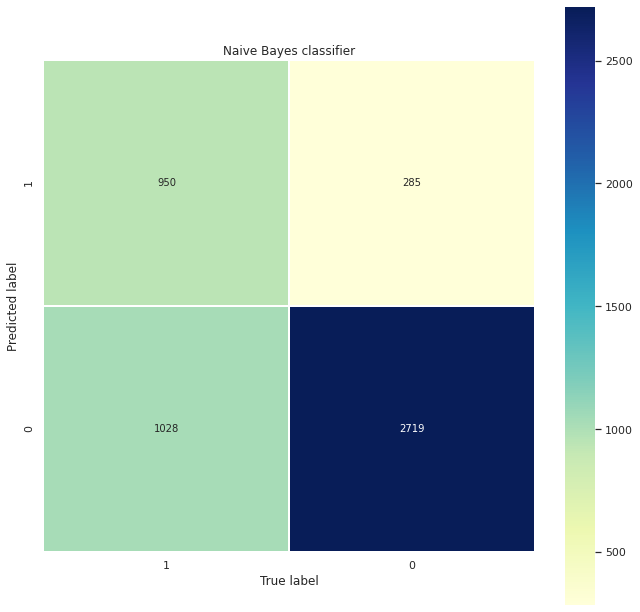

              precision    recall  f1-score   support

           1       0.77      0.48      0.59      1978
           0       0.73      0.91      0.81      3004

    accuracy                           0.74      4982
   macro avg       0.75      0.69      0.70      4982
weighted avg       0.74      0.74      0.72      4982

Classifier = XGBoost, Score (test, accuracy) = 74.25, Training time = 27.31 seconds


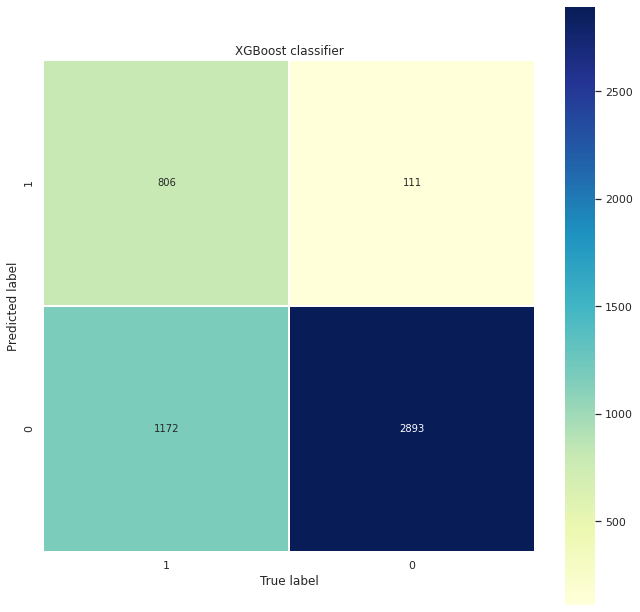

              precision    recall  f1-score   support

           1       0.88      0.41      0.56      1978
           0       0.71      0.96      0.82      3004

    accuracy                           0.74      4982
   macro avg       0.80      0.69      0.69      4982
weighted avg       0.78      0.74      0.71      4982

Classifier = LogisticRegression, Score (test, accuracy) = 74.23, Training time = 1.56 seconds


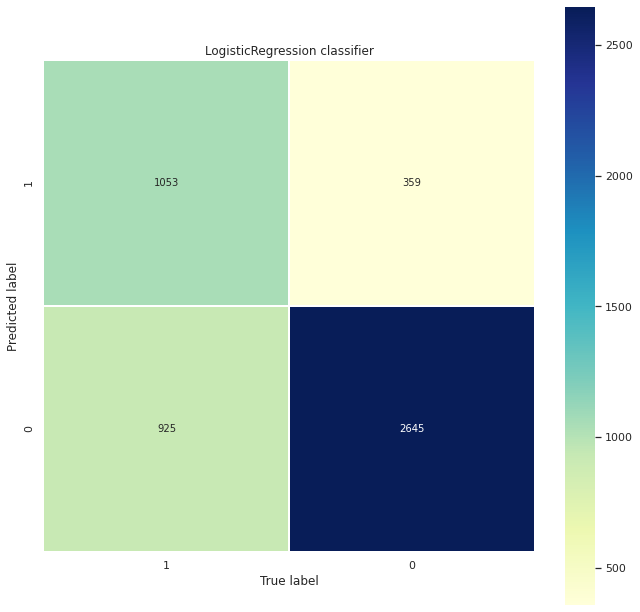

              precision    recall  f1-score   support

           1       0.75      0.53      0.62      1978
           0       0.74      0.88      0.80      3004

    accuracy                           0.74      4982
   macro avg       0.74      0.71      0.71      4982
weighted avg       0.74      0.74      0.73      4982

--------------------------------------------------------------------------------
[('Nearest Neighbors', 59.935768767563225), ('Linear SVM', 70.99558410276997), ('RBF SVM', 75.53191489361703), ('Decision Tree', 69.75110397430751), ('Random Forest', 60.37735849056604), ('Neural Net', 73.44439983942192), ('AdaBoost', 72.72179847450822), ('Naive Bayes', 73.64512244078684), ('XGBoost', 74.24729024488157), ('LogisticRegression', 74.22721798474508)]
Best --> Classifier = RBF SVM, Score (test, accuracy) = 75.53


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score,precision_score
from sklearn import  linear_model, metrics
import time
classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    MultinomialNB(),
    XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
    LogisticRegression()]

log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
max_score = 0.0
max_class = ''
accuracyScores = []
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    #start_time = datetime.datetime.now().time()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = 100.0 * clf.score(x_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    accuracyScores.append((name, score))
    mat_RFC = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(11,11))  
    ax.set_title(name + " " +"classifier")
    sns.heatmap(mat_RFC.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=ylabels,
            yticklabels=ylabels,linewidths=.5, ax=ax)
    plt.xlabel('True label')
    plt.ylabel('Predicted label');
    plt.show()

    cls_RFC = classification_report(y_test, y_pred, target_names=ylabels)
    print(cls_RFC)


    
    log_entry = pd.DataFrame([[name,score]], columns=log_cols)
    log = log.append(log_entry)

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print(accuracyScores)
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

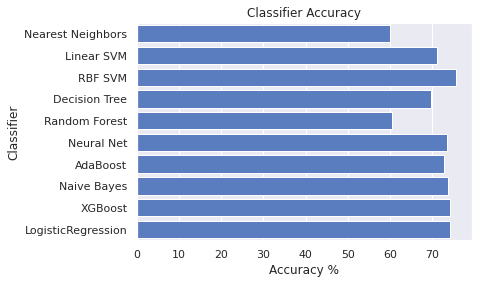

In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

Logistic Regression, Linear SVM, RBF SVM, Naive Bayes, Random Forest classifier have given highest accuracy.

###**Plotting the results of top 4 classifiers:**

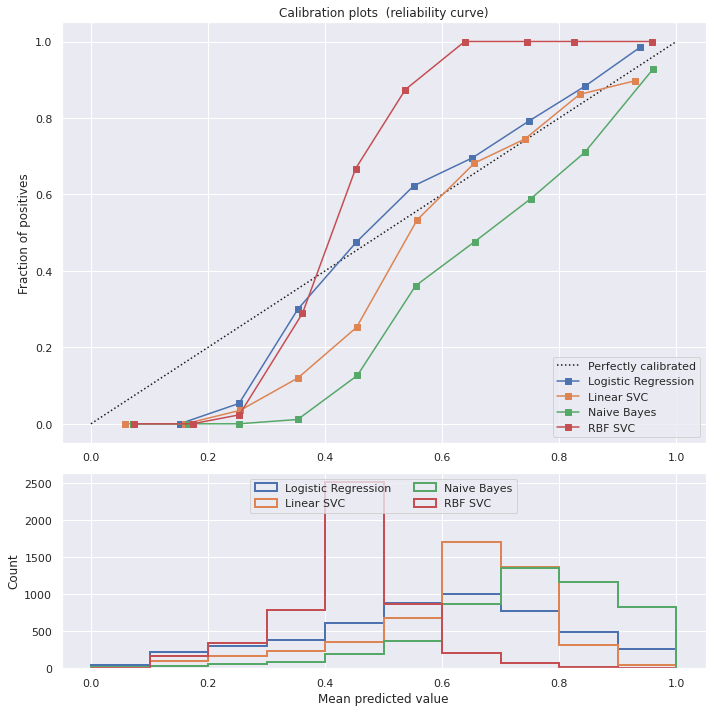

In [ ]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve


# Create classifiers
LogRegr = LogisticRegression()
linearSVC = SVC(kernel="linear", C=0.025)
nb = MultinomialNB()
rbfSvc = SVC(gamma=2, C=1)
rndmForest = RandomForestClassifier()

# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(LogRegr, 'Logistic Regression'),
                  (linearSVC,'Linear SVC'),
                  (nb,'Naive Bayes'),
                  (rbfSvc, 'RBF SVC')
                  # (rndmForest, 'Random Forest classifier')
                  ]:
    clf.fit(x_train, y_train)
    score = 100.0 * clf.score(x_test, y_test)
    if name == 'Logistic Regression':
      acc_LogisticRegression  = score
    if name == 'Linear SVC':
      acc_LinearSvc  = score
    if name == 'Naive Bayes':
      acc_NaiveBayes  = score
    if name == 'RBF SVC':
      acc_rbfSvc  = score     
    # if name == 'Random Forest Classifier':
    #   acc_rndmForest  = score
      
    
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(x_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(x_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear SVC', 'Naive Bayes', 'RBF SVC' #'Random Forest Classifier'
              ],
    'Score': [acc_LogisticRegression, acc_LinearSvc, acc_NaiveBayes, acc_rbfSvc #acc_rndmForest
              ]})
models.sort_values(by='Score', ascending=False)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

##**Pickle and load**

In [ ]:
import pickle
filename =  'Updated_SpamModel.sav'
pickle.dump(clf_best, open(filename, 'wb'))

#load model from the disk
loaded_model = pickle.load(open(filename, 'rb'))

#Load the saved model and evaluating accuracy
result = loaded_model.score(x_test, y_test)
print(result)

0.7553191489361702


In [ ]:
AmalgamatedData3.class_label.value_counts()

1    9791
0    6814
Name: class_label, dtype: int64

In [ ]:
class spamPipeline(object):
  def __init__(self, spam_dataset):
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import  LogisticRegression
    from sklearn import metrics
    from sklearn.pipeline import Pipeline

    self.logR_pipeline = Pipeline([
        ('LogRCV', vectorizer),
        ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
        ])
    
    self.logR_pipeline.fit(X_train,y_train)
    predicted_LogR = self.logR_pipeline.predict(X_test)
    predictions = self.logR_pipeline.predict_proba(X_test)[:,1]
    score = metrics.accuracy_score(y_test, predicted_LogR)
    prob_score_diff = predictions[1] - predictions[0]
    print(prob_score_diff)
    print("Spam classifier Trained - accuracy:   %0.6f" % score)

In [ ]:
spampipelineObj = spamPipeline(AmalgamatedData3)

-0.12343434896433891
Spam classifier Trained - accuracy:   0.734645


##**Distillation** -  LDA using topic modeliing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from datetime import datetime
import nltk
nltk.download('stopwords')
import pandas as pd
import re
import math

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = en_stop_words = set(stopwords.words('english'))

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()   

# list for tokenized documents in loop
texts = []

# loop through document list
for i in AmalgamatedData3['message']:
    
    # clean and tokenize document string
    print(i)
    #raw = i.lower()
    tokens = tokenizer.tokenize(i)
    #print(tokens)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)


# # turn our tokenized documents into a id <-> term dictionary
# dictionary = corpora.Dictionary(texts)
    
# # convert tokenized documents into a document-term matrix
# corpus = [dictionary.AmalgamatedData3(text) for text in texts]

Streaming output truncated to the last 5000 lines.
Roy Barnes voted against a bill in the state Senate that would have made it easier to convict child abusers.
Many just call him Lyin Ted. ... HisTV ad about John Kasich? Lie! Stations had to pull it off the air.
Says Republicans Mitt Romney and Paul Ryan support massive cuts in Social Security for future generations.
We created a flat tax in the state of Utah.
We had no domestic attacks under Bush.
The White House has "refused" international help in dealing with the oil spill.
Says personal-injury trial lawyers have provided over 80 percent of the funding for the Texas Democratic Party for over a decade.
Says Ted Cruz never denied his father was photographedwith Lee Harvey Oswald.
The governor does not have any power to veto a referendum [on same-sex marriage] that would be a constitutional amendment.
Our most important work has been creating and retaining almost 55,000 Ohio jobs.
Roy Barnes is part of the team that has run up trillion

In [ ]:
def get_most_freq_words(str, n=None):
    vect = CountVectorizer(stop_words='english').fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]
get_most_freq_words(AmalgamatedData3['message'],10)

[('trump', 23716),
 ('said', 21605),
 ('clinton', 18486),
 ('people', 12423),
 ('state', 10202),
 ('new', 10080),
 ('president', 9563),
 ('obama', 9362),
 ('campaign', 8042),
 ('hillary', 8009)]

In [ ]:
def get_most_freq_biwords(str, n=None):
    vect = CountVectorizer(stop_words=en_stop_words,analyzer='word', ngram_range=(2, 2)).fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n] 

get_most_freq_biwords(AmalgamatedData3['message'],10)

[('hillary clinton', 4763),
 ('donald trump', 4215),
 ('united states', 3366),
 ('white house', 2483),
 ('new york', 2329),
 ('president obama', 1387),
 ('barack obama', 1274),
 ('fox news', 1267),
 ('secretary state', 1211),
 ('supreme court', 1083)]

In [ ]:
# build a dictionary where for each text, each word has its own id.

spam_dictionary = Dictionary(texts)

# build the corpus i.e. vectors with the number of occurence of each word per tweet
spam_corpus = [spam_dictionary.doc2bow(text) for text in texts]

# compute coherence
spam_coherence = []
for nb_topics in range(1,20):
    lda = LdaModel(spam_corpus, num_topics = nb_topics, id2word = spam_dictionary, passes=10)
    cohm = CoherenceModel(model=lda, corpus=spam_corpus, dictionary=spam_dictionary, coherence='u_mass')
    coh = cohm.get_coherence()
    spam_coherence.append(coh)

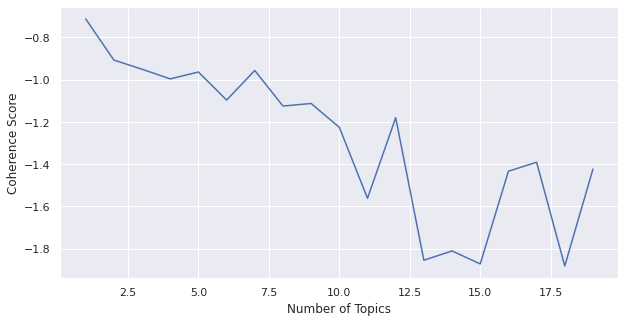

In [ ]:
# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,20),spam_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

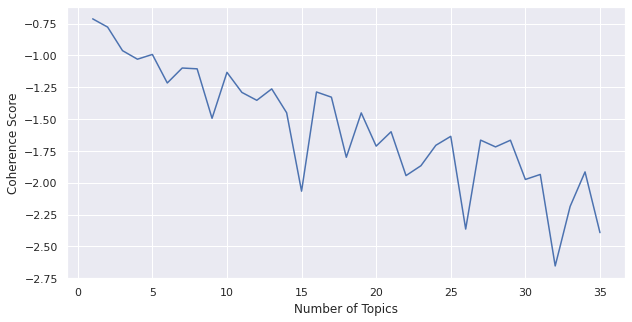

In [ ]:
# build a dictionary where for each text, each word has its own id.

spam_dictionary = Dictionary(texts)

# build the corpus i.e. vectors with the number of occurence of each word per tweet
spam_corpus = [spam_dictionary.doc2bow(text) for text in texts]

# compute coherence
spam_coherence = []
for nb_topics in range(1,36):
    lda = LdaModel(spam_corpus, num_topics = nb_topics, id2word = spam_dictionary, passes=10)
    cohm = CoherenceModel(model=lda, corpus=spam_corpus, dictionary=spam_dictionary, coherence='u_mass')
    coh = cohm.get_coherence()
    spam_coherence.append(coh)

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,36),spam_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

 topic 0:['trump', 'clinton', 'said', 'republican', 'I', 'the'] topic 1:['said', 'the', 'polic', 'investig', 'report', 'offic'] topic 2:['I', 'the', 'peopl', 'one', 'like', 'It'] topic 3:['court', 'law', 'state', 'suprem', 'right', 'case'] topic 4:['the', 'state', 'war', 'U', 'S', 'US'] topic 5:['year', 'say', 'percent', 'state', 'the', 'tax']


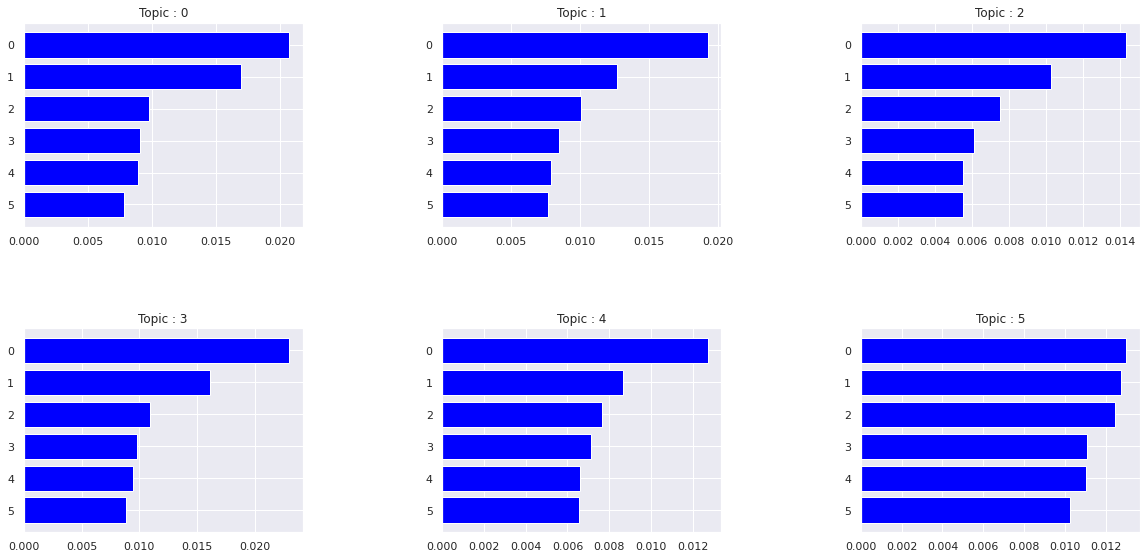

In [ ]:
from matplotlib import gridspec
#from the above plot,
k = 6

# generate LDA model
ldamodel = LdaModel(spam_corpus, num_topics=k, id2word = spam_dictionary, passes=20)
topics = ""

def plot_top_words(topics):
    lda=ldamodel
    nb_topics=k
    nb_words=6
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        # ax.set_yticklabels(top_words[i][:nb_words]+ top_words[i+1][:nb_words])
        topics = topics + " topic " + str(i) + ":" + str(top_words[i][:nb_words])
        #print("top_words" + str(top_words))
        #print("top_words[i][:nb_words]" + str(top_words[i][:nb_words]))
        plt.title("Topic : " +str(i))
    return topics
        

topics = plot_top_words("")
print(topics)  



In [ ]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

In [ ]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

In [ ]:

def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = AmalgamatedData3['message'].map(get_word_tokens)

In [ ]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

In [ ]:

def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

In [ ]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

In [ ]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

In [ ]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

In [ ]:
train_lda = AmalgamatedData3[['message']]
train_lda.head(4)
processed_docs = train_lda['message'].map(lambda doc: doc.split(" "))
processed_docs[:4]

0    [You, Can, Smell, Hillary’s, Fear, Daniel, Gre...
1    [Watch, The, Exact, Moment, Paul, Ryan, Commit...
2    [Kerry, to, go, to, Paris, in, gesture, of, sy...
3    [Bernie, supporters, on, Twitter, erupt, in, a...
Name: message, dtype: object

In [ ]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(AmalgamatedData3,
                                                                      'message')

######## DICTIONARY Words and occurences ########
0 
1 
And
2 
But
3 
Clinton
4 
Countless
5 
During
6 
Either
7 
Going
8 
Hillary
9 
Hillary’s
10 
If

 ######## BOW VECTOR FIRST ITEM ########
[(100, 2), (101, 1), (102, 1), (103, 2), (105, 1), (107, 3), (108, 1), (109, 4), (112, 2), (114, 1), (115, 1), (117, 1), (118, 2), (119, 1), (120, 2), (121, 2), (124, 1), (125, 1), (126, 1), (127, 1), (129, 4), (130, 1), (131, 1), (133, 2), (134, 1), (135, 3), (136, 1), (138, 3), (139, 1), (140, 1), (142, 1), (143, 1), (145, 1), (146, 1), (147, 1), (149, 2), (151, 2), (153, 4), (155, 1), (156, 1), (157, 1), (158, 2), (159, 3), (160, 2), (161, 1), (162, 1), (163, 1), (164, 1), (165, 1), (168, 1), (169, 1), (170, 6), (173, 1), (174, 1), (176, 1), (177, 1), (178, 1), (179, 1), (180, 1), (181, 1), (182, 1), (183, 1), (184, 1), (185, 1), (186, 1), (188, 1), (190, 1), (191, 1), (193, 2), (194, 2), (195, 1), (196, 2), (197, 1), (198, 2), (199, 1), (200, 1), (201, 1), (203, 1), (204, 1), (205, 2), (206, 

In [ ]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['that', 'this', 'with', 'have', 'they', 'from', 'trump', 'about', 'their', 'there']
1::['that', 'trump', 'with', 'have', 'this', 'would', 'will', 'about', 'they', 'their']
2::['that', 'with', 'this', 'have', 'more', 'people', 'their', 'they', 'women', 'than']
3::['that', 'with', 'this', 'trump', 'they', 'more', 'from', 'will', 'black', 'like']
4::['that', 'trump', 'with', 'this', 'said', 'have', 'they', 'people', 'what', 'from']
5::['that', 'from', 'with', 'have', 'this', 'they', 'more', 'were', 'about', 'over']
6::['that', 'said', 'have', 'with', 'they', 'from', 'will', 'were', 'been', 'this']
7::['that', 'this', 'will', 'their', 'they', 'from', 'with', 'have', 'about', 'states']
8::['that', 'percent', 'have', 'with', 'from', 'more', 'than', 'says', 'would', 'state']
9::['that', 'with', 'said', 'trump', 'have', 'from', 'this', 'they', 'will', 'would']


In [ ]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(100, 0.022012262336383794),
 (101, 0.046891885633188704),
 (102, 0.030882794969306553),
 (103, 0.08429983973533353),
 (105, 0.04290989405047964),
 (107, 0.11617584124793462),
 (108, 0.01324828410753378),
 (109, 0.06163992551235149),
 (112, 0.06994794808322749),
 (114, 0.028006946869017252),
 (115, 0.039225780843568946),
 (117, 0.03742101307452791),
 (118, 0.05935435729935112),
 (119, 0.028695840127888093),
 (120, 0.04123328738594748),
 (121, 0.026050181790490238),
 (124, 0.037632092224948406),
 (125, 0.03625397302631854),
 (126, 0.029364239170884383),
 (127, 0.030504685908962183),
 (129, 0.07878706509944261),
 (130, 0.0540148273314527),
 (131, 0.027708933631106276),
 (133, 0.06513223084935393),
 (134, 0.04990766443996799),
 (135, 0.14349153625691172),
 (136, 0.039329514486139326),
 (138, 0.07330457984979873),
 (139, 0.0339999483458461),
 (140, 0.03685642320232551),
 (142, 0.04651929819151883),
 (143, 0.016829527306724382),
 (145, 0.03986805

In [ ]:

lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['percent', 'says', 'thats', 'taxes', 'marriage', 'than', 'county', 'lowest', 'income', 'that']
1::['taxes', 'earmarks', 'says', 'millionaires', 'property', 'trillion', 'poverty', 'electric', 'that', 'invented']
2::['says', 'cant', 'that', 'amnesty', 'breaks', 'have', 'from', 'state', 'lobbyist', 'percent']
3::['that', 'trump', 'with', 'said', 'this', 'have', 'they', 'from', 'about', 'will']
4::['says', 'percent', 'unemployment', 'jobs', 'rate', 'voted', 'than', 'average', 'education', 'states']
5::['health', 'care', 'insurance', 'stimulus', 'says', 'billion', 'percent', 'budget', 'million', 'plan']
6::['dont', 'says', 'that', 'have', 'than', 'more', 'youre', 'people', 'percent', 'border']
7::['debt', 'didnt', 'wage', 'says', 'minimum', 'reform', 'trillion', 'administration', 'billion', 'jobs']
8::['says', 'that', 'nuclear', 'court', 'said', 'bill', 'senate', 'supreme', 'president', 'with']
9::['says', 'seniors', 'doesnt', 'voted', 'cents', 'million', 'businesses', 'percent', 'dolla

In [ ]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
AmalgamatedData3 = update_lda_results_to_dataset(
    AmalgamatedData3, headlinetopiccolnames,'message', dictionary_headline, lda_model_headline, lda_headline_topic_words)
AmalgamatedData3.head()

,message,class_label,topic_number,lda_score,topic_top_words
0,You Can Smell Hillary’s Fear Daniel Greenfield...,0,0,0.909418,that this with have they from trump about thei...
1,Watch The Exact Moment Paul Ryan Committed Pol...,0,0,0.786748,that this with have they from trump about thei...
2,Kerry to go to Paris in gesture of sympathy U....,1,9,0.740461,that with said trump have from this they will ...
3,Bernie supporters on Twitter erupt in anger ag...,0,0,0.550517,that this with have they from trump about thei...
4,The Battle of New York: Why This Primary Matte...,1,6,0.505268,that said have with they from will were been this


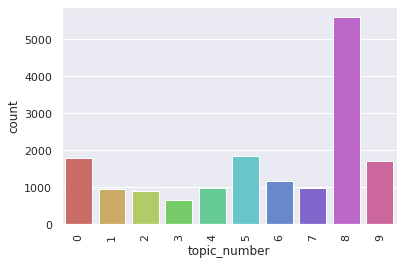

In [ ]:
import seaborn as sb
def create_distribution(dataFile):
    g = sb.countplot(x='topic_number', data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g

create_distribution(AmalgamatedData3)

In [ ]:
class spamLDAPipelineSVM(object):
  def __init__(self, spam_dataset):
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import  LogisticRegression
    from sklearn import metrics
    from sklearn.pipeline import Pipeline

    self.RbfSvm_pipeline = Pipeline([
        ('RbfSvmCV', vectorizer),
        ('RbfSvm_clf',SVC(gamma=2, C=1, probability= True))
        ])
    
    self.RbfSvm_pipeline.fit(AmalgamatedData3['message'],AmalgamatedData3['topic_number'])
    predicted_RbfSvm = self.RbfSvm_pipeline.predict(X_test)
    predictions = self.RbfSvm_pipeline.predict_proba(X_test)[:,1]
    score = metrics.accuracy_score(y_test, predicted_RbfSvm)
    prob_score_diff = predictions[1] - predictions[0]
    print(prob_score_diff)
    print("LDA Topic model Trained - accuracy:   %0.6f" % score)

In [ ]:
spamLDAPipelineSVMobj = spamLDAPipelineSVM(AmalgamatedData3)

0.00034347049083842136
LDA Topic model Trained - accuracy:   0.098956


In [ ]:
class spamPipelineSVM(object):
  def __init__(self, spam_dataset):
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import  LogisticRegression
    from sklearn import metrics
    from sklearn.pipeline import Pipeline

    self.RbfSvm_pipeline = Pipeline([
        ('RbfSvmCV', vectorizer),
        ('RbfSvm_clf',SVC(gamma=2, C=1, probability= True))
        ])
    
    self.RbfSvm_pipeline.fit(X_train,y_train)
    predicted_RbfSvm = self.RbfSvm_pipeline.predict(X_test)
    predictions = self.RbfSvm_pipeline.predict_proba(X_test)[:,1]
    score = metrics.accuracy_score(y_test, predicted_RbfSvm)
    prob_score_diff = predictions[1] - predictions[0]
    print(prob_score_diff)
    print("Spam classifier Trained - accuracy:   %0.6f" % score)



In [ ]:
spampipelineRbfSvmObj = spamPipelineSVM(AmalgamatedData3)

-0.24155475298372486
Spam classifier Trained - accuracy:   0.765556


##**function to test the prediction in another dataset**

Scraping  data from this politifact, fact checks on Nancy Pelosi- Speaker of the US representatives website to predict the spam classification https://www.politifact.com/factchecks/list/?speaker=nancy-pelosi

In [ ]:
url = 'https://www.politifact.com/factchecks/list/?speaker=donald-trump-jr'
# page_link = 'https://www.ofm.wa.gov/washington-data-research/statewide-data/washington-trends/economic-trends/median-home-price'
page_response1 = requests.get(url, timeout=5)
# here, we fetch the content from the url, using the requests library
page_content1 = BeautifulSoup(page_response1.content, "html.parser")
#we use the html parser to parse the url content and store it in a variable.
print(page_content)


<!DOCTYPE html>

<html dir="ltr" lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title> | PolitiFact </title>
<meta content="PolitiFact is a fact-checking website that rates the accuracy of claims by elected officials and others on its Truth-O-Meter." name="description">
<meta content="PolitiFact" name="twitter:username">
<meta content="summary" name="twitter:card">
<meta content="PolitiFact" name="twitter:site"/>
<meta content="" name="twitter:url">
<meta content="" name="twitter:title"/>
<meta content="PolitiFact is a fact-checking website that rates the accuracy of claims by elected officials and others on its Truth-O-Meter." name="twitter:description"/>
<meta content="" name="twitter:image"/>
<link href="https://static.politifact.com/images/favicon.ico" rel="shortcut icon" type="image/ico"/>
<link href="https://static.politifact.com/images/favicon.png" rel="ic

In [ ]:
dataVal = []
articlesNancyPelosi = page_content1.find_all('div', attrs={'class':'m-statement__quote'})



rows = articlesNancyPelosi
for row in rows:
    cols = row.find_all('a')
    cols = [ele.text.strip() for ele in cols]
    dataVal.append([ele for ele in cols if ele]) # Get rid of empty values
    


In [ ]:
dataVal

[['Wisconsin voter turnout jumped from 67% in 2016 to 89% in 2020.'],
 ['The number of coronavirus deaths is “almost nothing.”'],
 ['“Joe Biden wants to raise taxes on 82% of all Americans.”'],
 ['“8% of the votes cast” in Michigan’s Aug. 4 primary, 864 mailed ballots, came from dead voters. “NOTHING TO SEE HERE!!!”'],
 ['"Marquette University threatened to rescind student’s admission over pro-Trump TikTok video."'],
 ['Says Osama bin Laden endorsed Joe Biden'],
 ['"It’s only a federal crime for the" inspector general to out a whistleblower.'],
 ['"Tens of thousands" of people leave New York every week.'],
 ['"Nearly 200,000 Florida voters may not be citizens."'],
 ['"You see the Nazi platform from the early 1930s ... look at it compared to the (Democratic Party) platform of today, you\'re saying, \'Man, those things are awfully similar.\'"'],
 ['Unemployment numbers "are artificial numbers. These are numbers that are massaged to make the existing economy look good, to make this admini

In [ ]:
ScrapedData2 = pd.DataFrame()

In [ ]:
messageData1 = []
for arr in range(0,len(dataVal)):
  stringVal1 = (str(dataVal[arr])).replace('["“',"")
  stringVal2 = stringVal1.replace('”"]',"")
  stringVal3 = stringVal2.replace("['","")
  stringUpdated1 = stringVal3.replace("']","")
  messageData1.append(stringUpdated1)

In [ ]:
messageData1

['Wisconsin voter turnout jumped from 67% in 2016 to 89% in 2020.',
 'The number of coronavirus deaths is “almost nothing.”',
 '“Joe Biden wants to raise taxes on 82% of all Americans.”',
 '“8% of the votes cast” in Michigan’s Aug. 4 primary, 864 mailed ballots, came from dead voters. “NOTHING TO SEE HERE!!!”',
 '"Marquette University threatened to rescind student’s admission over pro-Trump TikTok video."',
 'Says Osama bin Laden endorsed Joe Biden',
 '"It’s only a federal crime for the" inspector general to out a whistleblower.',
 '"Tens of thousands" of people leave New York every week.',
 '"Nearly 200,000 Florida voters may not be citizens."',
 '"You see the Nazi platform from the early 1930s ... look at it compared to the (Democratic Party) platform of today, you\\\'re saying, \\\'Man, those things are awfully similar.\\\'"',
 'Unemployment numbers "are artificial numbers. These are numbers that are massaged to make the existing economy look good, to make this administration look g

In [ ]:
messageData1

['Wisconsin voter turnout jumped from 67% in 2016 to 89% in 2020.',
 'The number of coronavirus deaths is “almost nothing.”',
 '“Joe Biden wants to raise taxes on 82% of all Americans.”',
 '“8% of the votes cast” in Michigan’s Aug. 4 primary, 864 mailed ballots, came from dead voters. “NOTHING TO SEE HERE!!!”',
 '"Marquette University threatened to rescind student’s admission over pro-Trump TikTok video."',
 'Says Osama bin Laden endorsed Joe Biden',
 '"It’s only a federal crime for the" inspector general to out a whistleblower.',
 '"Tens of thousands" of people leave New York every week.',
 '"Nearly 200,000 Florida voters may not be citizens."',
 '"You see the Nazi platform from the early 1930s ... look at it compared to the (Democratic Party) platform of today, you\\\'re saying, \\\'Man, those things are awfully similar.\\\'"',
 'Unemployment numbers "are artificial numbers. These are numbers that are massaged to make the existing economy look good, to make this administration look g

In [ ]:
ScrapedData2['message'] = messageData1

In [ ]:
ScrapedData2

,message
0,Wisconsin voter turnout jumped from 67% in 201...
1,The number of coronavirus deaths is “almost no...
2,“Joe Biden wants to raise taxes on 82% of all ...
3,“8% of the votes cast” in Michigan’s Aug. 4 pr...
4,"""Marquette University threatened to rescind st..."
5,Says Osama bin Laden endorsed Joe Biden
6,"""It’s only a federal crime for the"" inspector ..."
7,"""Tens of thousands"" of people leave New York e..."
8,"""Nearly 200,000 Florida voters may not be citi..."
9,"""You see the Nazi platform from the early 1930..."


In [ ]:
    from sklearn import svm
    from sklearn.model_selection import train_test_split
    clf = svm.SVC(kernel='linear', probability=True)
    X_train, X_test, y_train, y_test = train_test_split(AmalgamatedData2['message'], AmalgamatedData2['class_label'], test_size = 0.1, random_state = 1)
    vector = TfidfVectorizer(max_df= 0.9).fit(X_train)
    
    X_train = vector.fit_transform(X_train)
    X_test = vector.transform(X_test)
    clf.fit(X_train, y_train)
    y_pred_SVC = clf.predict(X_test)
    
    text = vector.transform(["Says the Annies List political group supports"])
    simpleText = clf.predict(text)
    text_proba = clf.predict_proba(text)[:,1]
    text_proba
    

array([0.84927545])

In [ ]:
ScrapedData2

,message
0,Wisconsin voter turnout jumped from 67% in 201...
1,The number of coronavirus deaths is “almost no...
2,“Joe Biden wants to raise taxes on 82% of all ...
3,“8% of the votes cast” in Michigan’s Aug. 4 pr...
4,"""Marquette University threatened to rescind st..."
5,Says Osama bin Laden endorsed Joe Biden
6,"""It’s only a federal crime for the"" inspector ..."
7,"""Tens of thousands"" of people leave New York e..."
8,"""Nearly 200,000 Florida voters may not be citi..."
9,"""You see the Nazi platform from the early 1930..."


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(AmalgamatedData3['message'], AmalgamatedData3['class_label'], test_size = 0.3, random_state = 0)
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(X_train)
x_test = vectorizer.transform(X_test)
# x_train = np.array(x_train)
# y_train = np.array(y_train)
# x_test = np.array(x_test)
# y_test_np = np.array(y_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11623, 59394)
(4982, 59394)
(11623,)
(4982,)


In [ ]:
ylabel = train_news['class_label'].unique()
ylabels=["1" if x == 1 else "0" for x in ylabel]
ylabels

['1', '0']

In [ ]:
class DatacleaningAmalgamated(object):
  def __init__(self, AmalgamatedData3):
    self.AmalgamatedData3 = AmalgamatedData3

  def review_messages(self,msg):
    # converting messages to lowercase
    msg = msg.lower()
    return msg

  def spam_cleaning(self):
    AmalgamatedData3 = self.AmalgamatedData3
    # AmalgamatedData3['spam_classification'] = AmalgamatedData3['spam_classification'].map({'ham': 0, 'spam': 1})
    AmalgamatedData3['message'] = AmalgamatedData3['message'].apply(self.review_messages)
    return AmalgamatedData3

In [ ]:
# AmalgamatedData3 = pd.read_csvAmalgamated2.csv', error_bad_lines=False)
spamObj = DatacleaningAmalgamated(AmalgamatedData3)
spamamalgamated_clean = spamObj.spam_cleaning()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
def isSpam():
  x = []
  for line in ScrapedData2['message']:
    pm = vector.transform([line])
    if(clf.predict(pm)):
      x.append('spam')
    else:
      x.append('ham')
  return x;

ScrapedData2['SpamHam'] = isSpam()
ScrapedData2.head()

,message,SpamHam
0,Wisconsin voter turnout jumped from 67% in 201...,ham
1,The number of coronavirus deaths is “almost no...,ham
2,“Joe Biden wants to raise taxes on 82% of all ...,spam
3,“8% of the votes cast” in Michigan’s Aug. 4 pr...,spam
4,"""Marquette University threatened to rescind st...",spam


In [ ]:
ScrapedData2['SpamHam'].value_counts()

spam    10
ham      2
Name: SpamHam, dtype: int64

In [ ]:
#ScrapedData2.to_csv('/content/drive/My Drive/ML/AlternusVera/FactCheckDonaldTrumpJr.csv')

##**Predicting given text**

In [ ]:
class SpamClassification(object):
  from sklearn.model_selection import train_test_split
  # def __init__(self, spam_dataset):
  from sklearn.feature_extraction.text import TfidfVectorizer
  from sklearn.linear_model import  LogisticRegression
  from sklearn import metrics
  from sklearn.pipeline import Pipeline

  self.RbfSvm_pipeline = Pipeline([('RbfSvmCV', vectorizer), ('RbfSvm_clf',SVC(gamma=2, C=1, probability= True))])
    
  self.RbfSvm_pipeline.fit(X_train,y_train)
  predicted_RbfSvm = self.RbfSvm_pipeline.predict(X_test)
  predictions = self.RbfSvm_pipeline.predict_proba(X_test)[:,1]
  score = metrics.accuracy_score(y_test, predicted_RbfSvm)
  prob_score_diff = predictions[1] - predictions[0]
  print(prob_score_diff)
  print("Spam classifier Trained - accuracy:   %0.6f" % score)

  def predict(self, text):
        predicted = self.RbfSvm_pipeline.predict([text])
        predicedProb = self.RbfSvm_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)

NameError: ignored

In [ ]:
spampipelineObj = SpamClassification(AmalgamatedData3)
spampipelineObj.predict("Says the Annies List political group supports third-trimester abortions on demand.")

-0.24382984326760004
Spam classifier Trained - accuracy:   0.765556


(True, 0.8601459955129874)

In [ ]:
import pickle
filename =  'Seekers_SpamClassification.sav'
pickle.dump(clf_best, open(filename, 'wb'))

#load model from the disk
loaded_model = pickle.load(open(filename, 'rb'))

#Load the saved model and evaluating accuracy
result = loaded_model.score(x_test, y_test)
print(result)

0.7655560016057809
